In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Thesis/

Mounted at /content/drive
/content/drive/MyDrive/Thesis


In [ ]:
import pandas as pd
df = pd.read_excel('Final_Movie_Set.xlsx')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15202 entries, 0 to 15201
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Text                                 15202 non-null  object 
 1   Description                          15202 non-null  object 
 2   year _x                              15202 non-null  int64  
 3   Running_Time_x                       15202 non-null  object 
 4   Keywords_x                           15202 non-null  object 
 5   Description_x                        15202 non-null  object 
 6   Rating                               4031 non-null   object 
 7   CreativeType                         13504 non-null  object 
 8   Source                               13590 non-null  object 
 9   Genre                                14524 non-null  object 
 10  Languages                            1713 non-null   object 
 11  Production_type             

In [ ]:
import ast

# Suppose your column with string values is called "string_column"
# Define a function to convert a string to a list
def string_to_list(s):
    return ast.literal_eval(s)

# Apply the function to convert the string column to a list column
df['Keywords_x'] = df['Keywords_x'].apply(string_to_list)
df['Running_Time_x'] = df['Running_Time_x'].apply(string_to_list)
df['Lead_Actors'] = df['Lead_Actors'].apply(string_to_list)
df['Supporting_Actors'] = df['Supporting_Actors'].apply(string_to_list)
df['Supporting_Characters'] = df['Supporting_Characters'].apply(string_to_list)
df['Lead_Characters'] = df['Lead_Characters'].apply(string_to_list)


In [ ]:
import numpy as np

# Define a list of columns that contain lists
list_columns = ['Keywords_x', 'Running_Time_x', 'Lead_Actors', 'Supporting_Actors', 'Supporting_Characters', 'Lead_Characters']



# Replace remaining empty values with NaN
for column in list_columns:
    df[column] = df[column].apply(lambda x: np.nan if x == [] else x)

In [ ]:
print(df.info())
print(df.head())
#General Info : 15202 rows / 43 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15202 entries, 0 to 15201
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Text                                 15202 non-null  object 
 1   Description                          15202 non-null  object 
 2   year _x                              15202 non-null  int64  
 3   Running_Time_x                       12835 non-null  object 
 4   Keywords_x                           5920 non-null   object 
 5   Description_x                        15202 non-null  object 
 6   Rating                               4031 non-null   object 
 7   CreativeType                         13504 non-null  object 
 8   Source                               13590 non-null  object 
 9   Genre                                14524 non-null  object 
 10  Languages                            1713 non-null   object 
 11  Production_type             

In [ ]:
import pandas as pd

# Create a dictionary with the desired information
info_dict = {
    'Column': df.columns,
    'Non-Null Count': df.count(),
    'Dtype': df.dtypes
}

# Create a DataFrame from the dictionary
info_df = pd.DataFrame(info_dict)

# Add additional information
info_df['Memory Usage'] = df.memory_usage().sum()

# Print the DataFrame
print(info_df)


                                                                  Column  \
Text                                                                Text   
Description                                                  Description   
year _x                                                          year _x   
Running_Time_x                                            Running_Time_x   
Keywords_x                                                    Keywords_x   
Description_x                                              Description_x   
Rating                                                            Rating   
CreativeType                                                CreativeType   
Source                                                            Source   
Genre                                                              Genre   
Languages                                                      Languages   
Production_type                                          Production_type   
Running_Time

# **General Information**

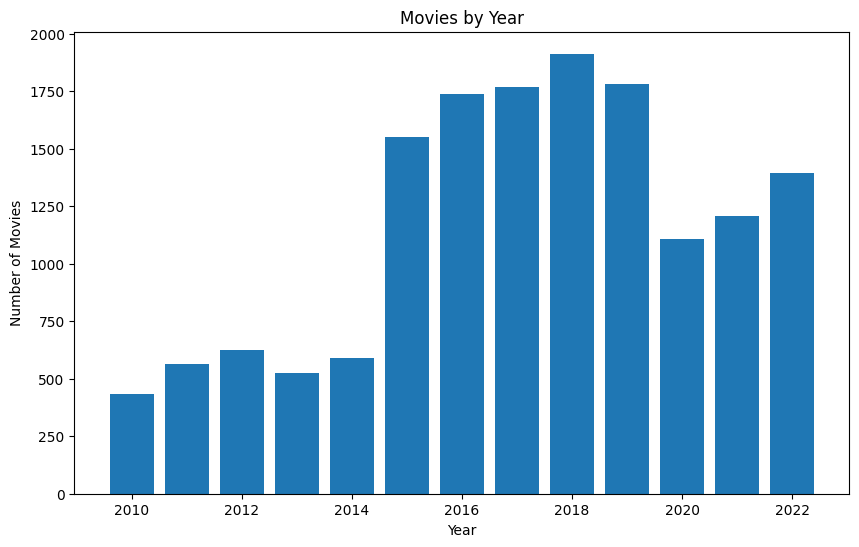

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

year_counts = df['year _x'].value_counts()

# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))  # Set a smaller figure size
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies by Year')



plt.show()


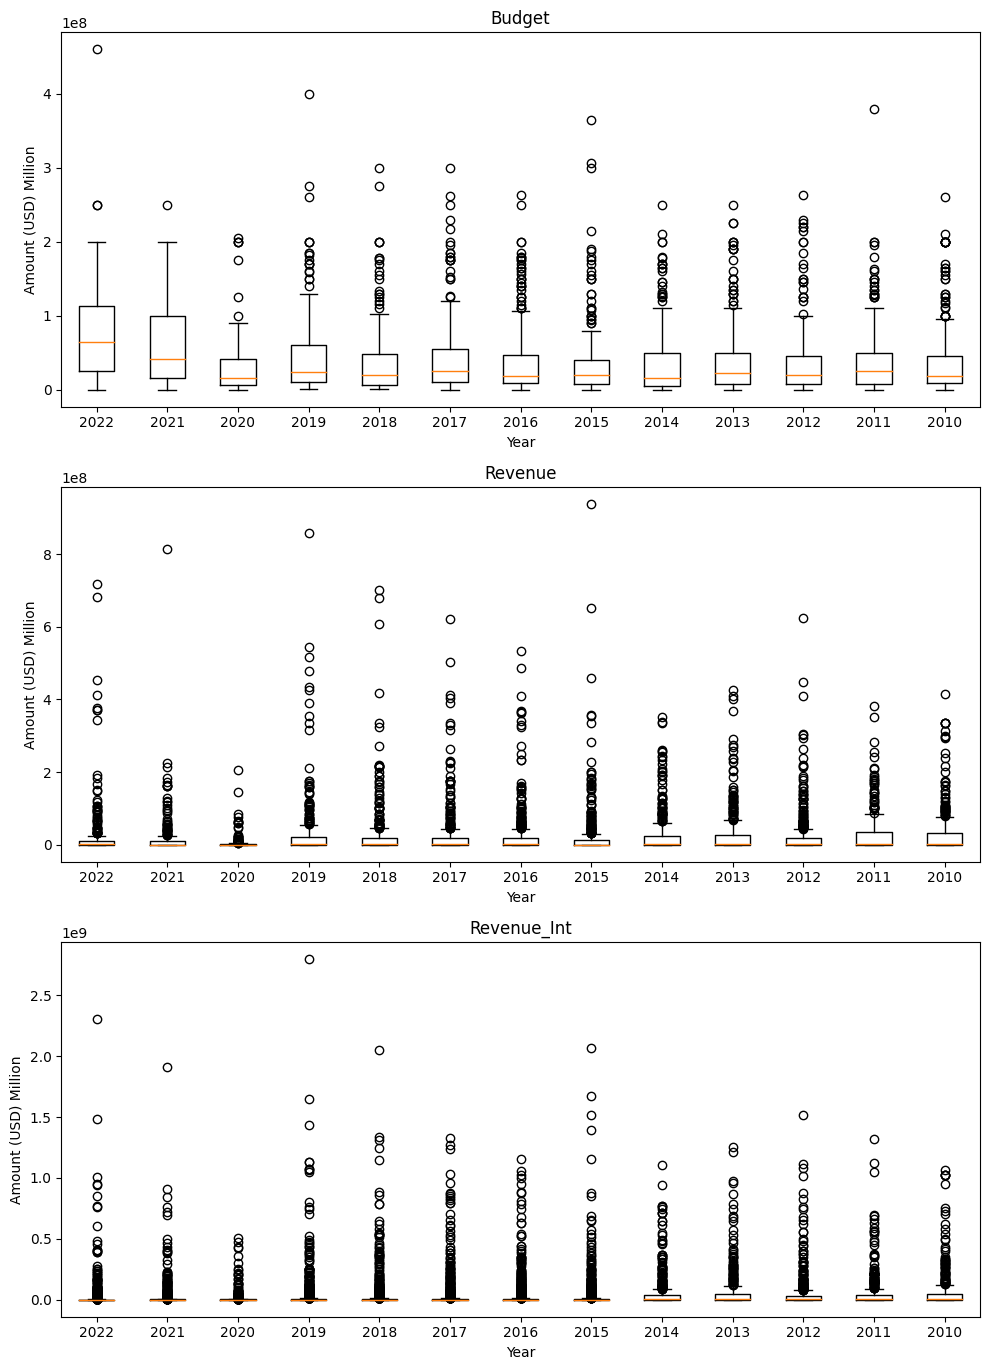

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set up the figure with 3 subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Loop through each subplot and create a box plot
for i, col in enumerate(['budget', 'Revenue', 'Revenue_int']):
    ax = axes[i]
    ax.set_title(col.title())
    ax.set_ylabel('Amount (USD) Million')
    ax.set_xlabel('Year')
    data = []
    for year in df['year _x'].unique():
        year_data = df[df['year _x']==year][col]
        data.append(year_data.dropna().values)
    ax.boxplot(data)
    ax.set_xticklabels(df['year _x'].unique())

# Adjust the spacing between subplots
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

#noramlizar inputs/ ajsutar en inflacion 


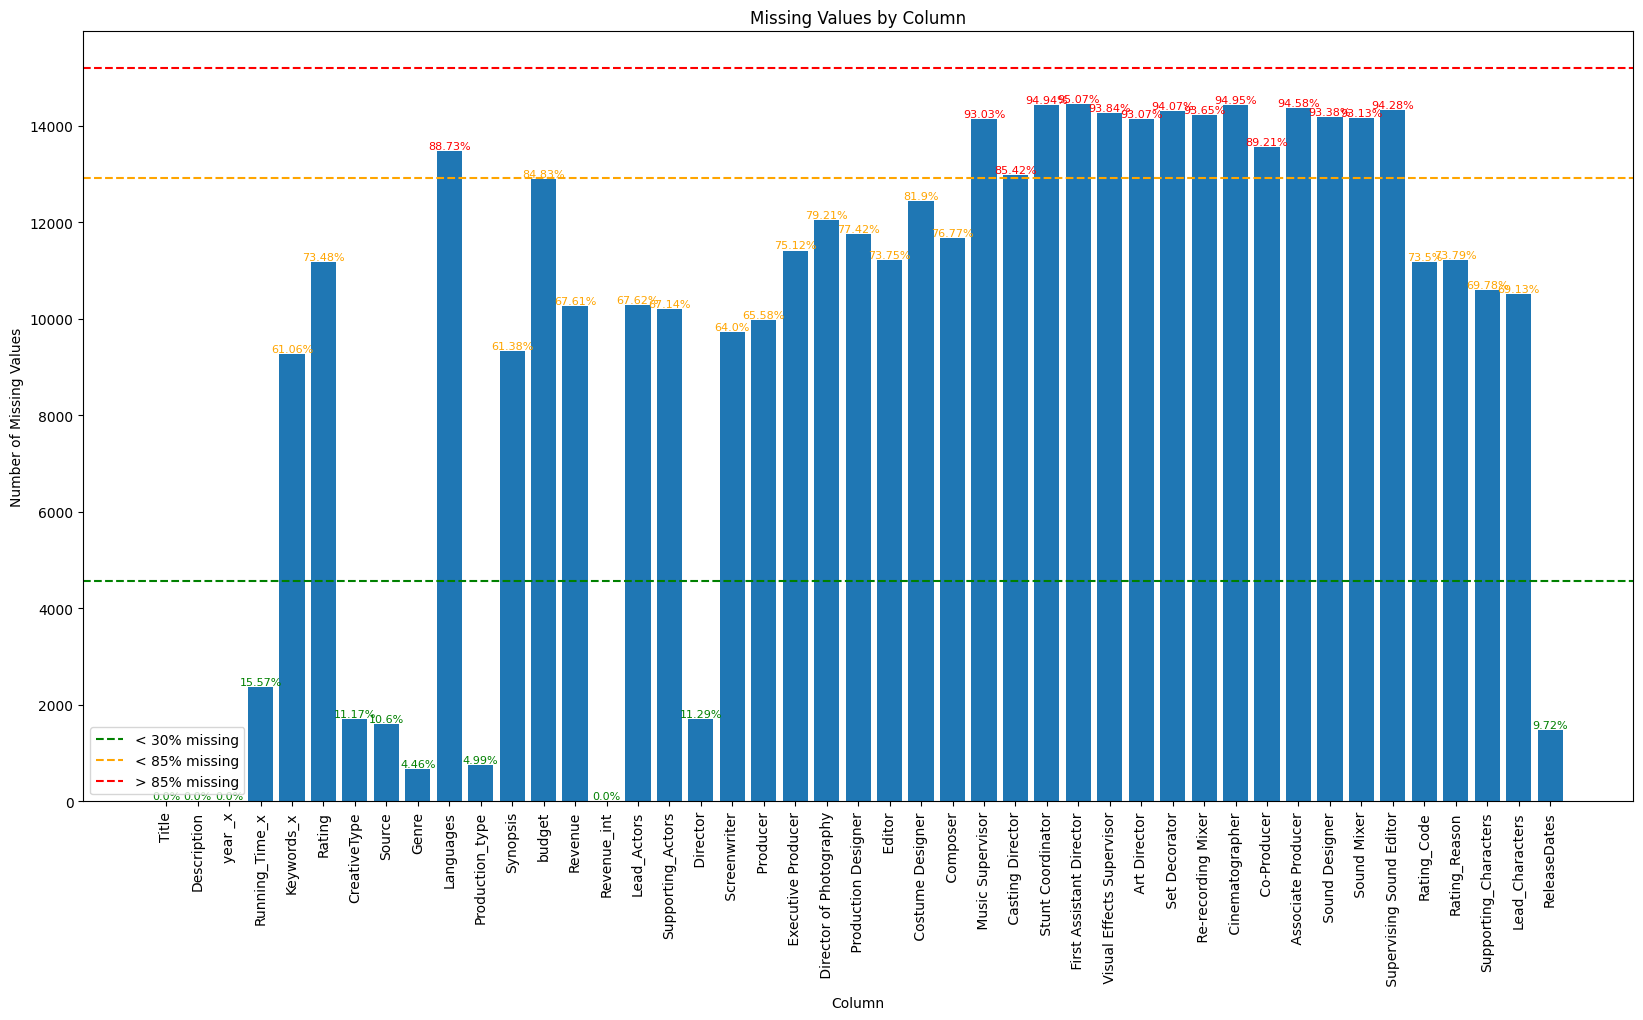

In [ ]:
# Count the number of missing values for each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
percent_missing = round((missing_values / len(df)) * 100, 2)

# Set thresholds for differentiating between low, medium, and high missing values
low_threshold = 30
high_threshold = 85

# Create a bar plot to visualize the results
plt.figure(figsize=(20, 10))  # Set the figure size
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Column')

# Add percentage of missing values as text, and differentiate between low, medium, and high missing values
for i, v in enumerate(percent_missing):
    if v < low_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='green')
    elif v < high_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='orange')
    else:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='red')

# Add horizontal lines to identify the different thresholds
plt.axhline(y=low_threshold*len(df)/100, color='green', linestyle='--', label=f'< {low_threshold}% missing')
plt.axhline(y=high_threshold*len(df)/100, color='orange', linestyle='--', label=f'< {high_threshold}% missing')
plt.axhline(y=len(df), color='red', linestyle='--', label=f'> {high_threshold}% missing')
plt.legend()

plt.show()


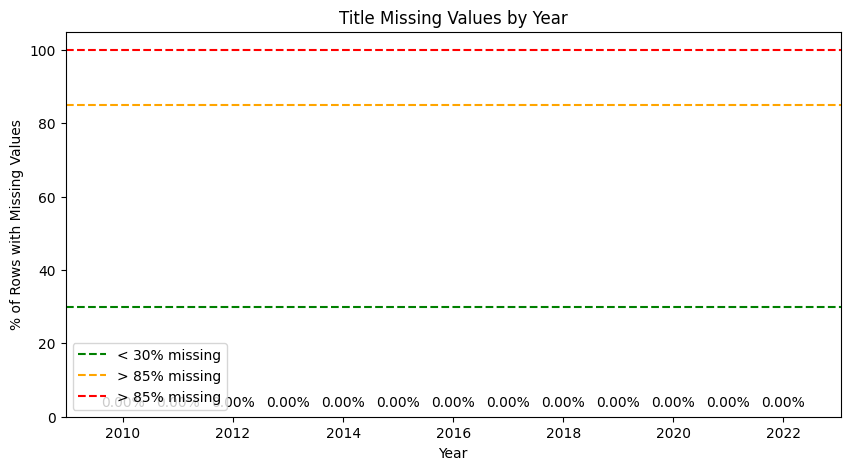

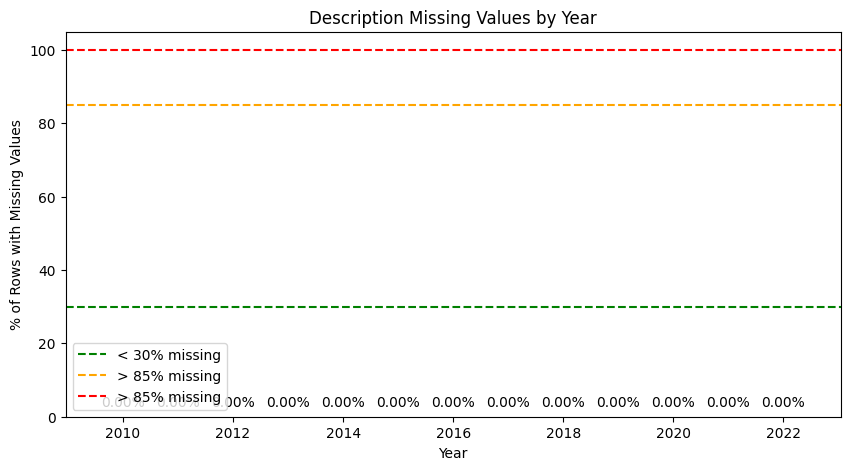

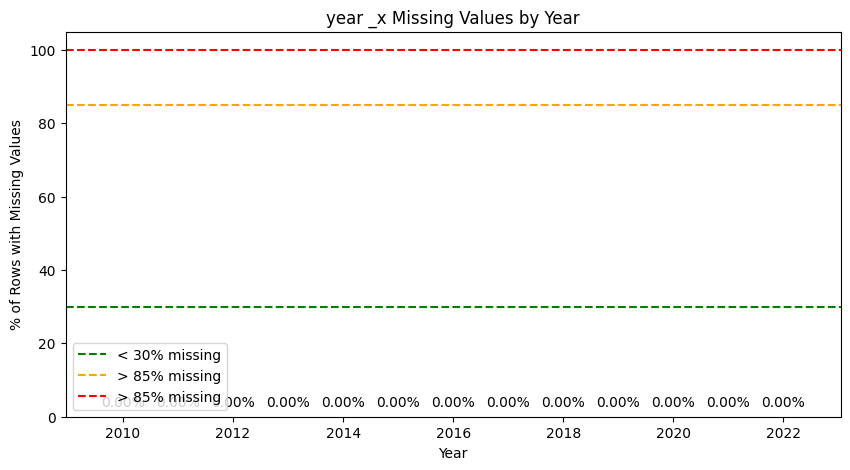

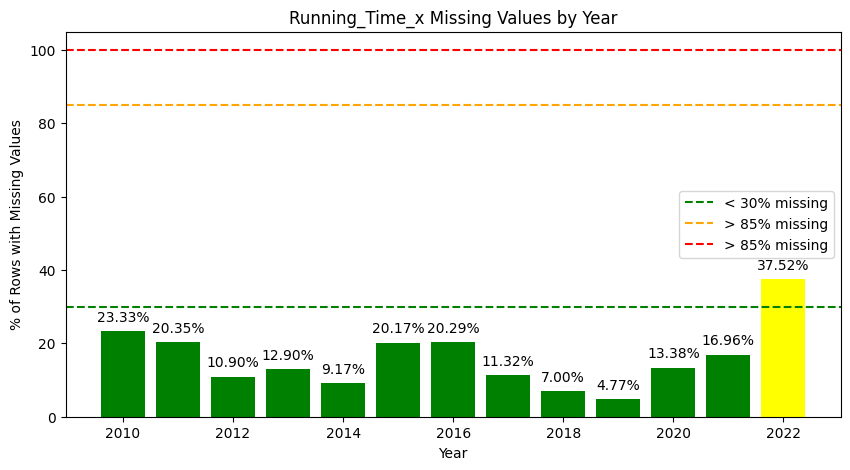

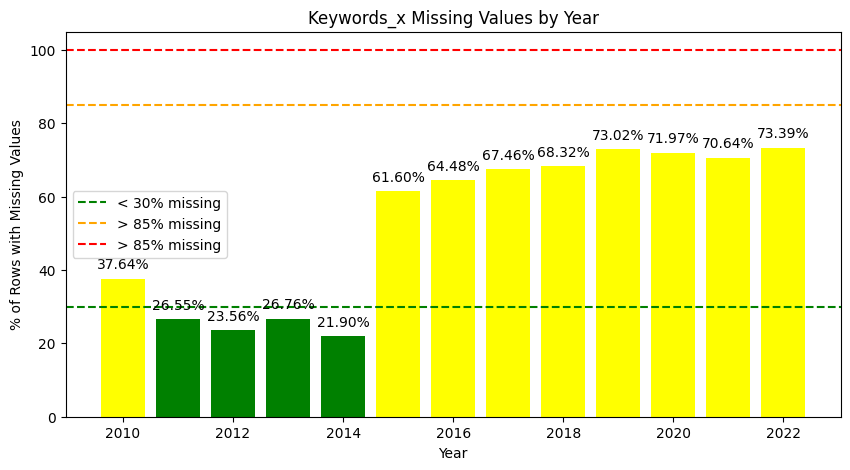

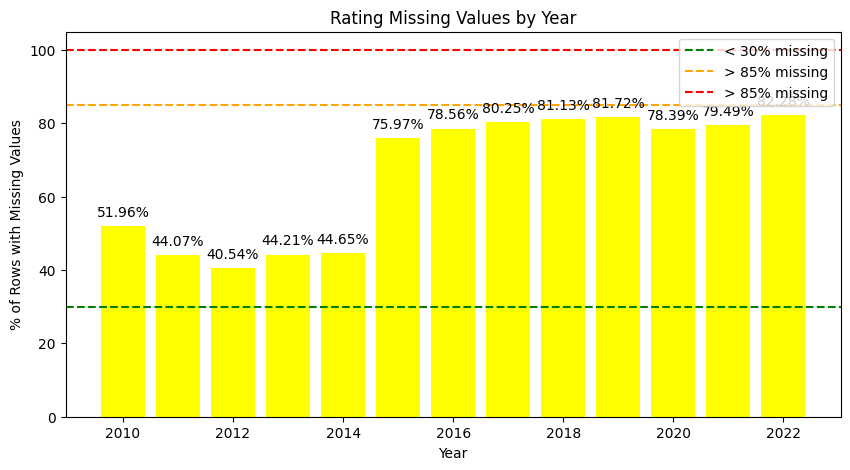

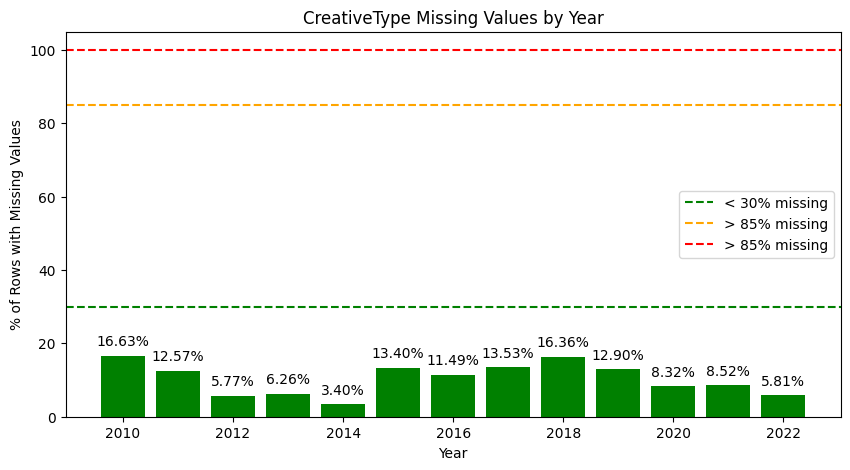

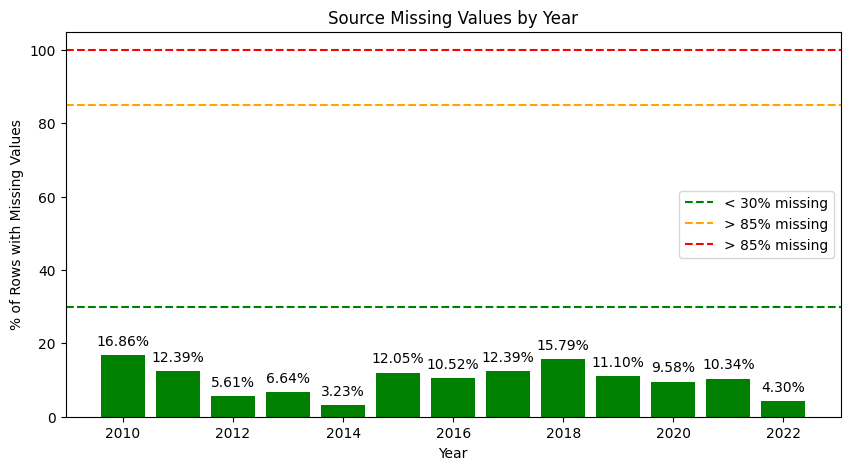

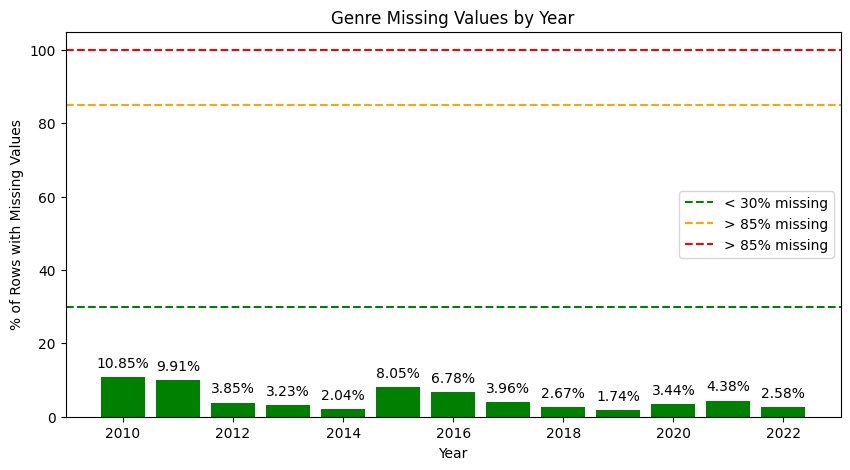

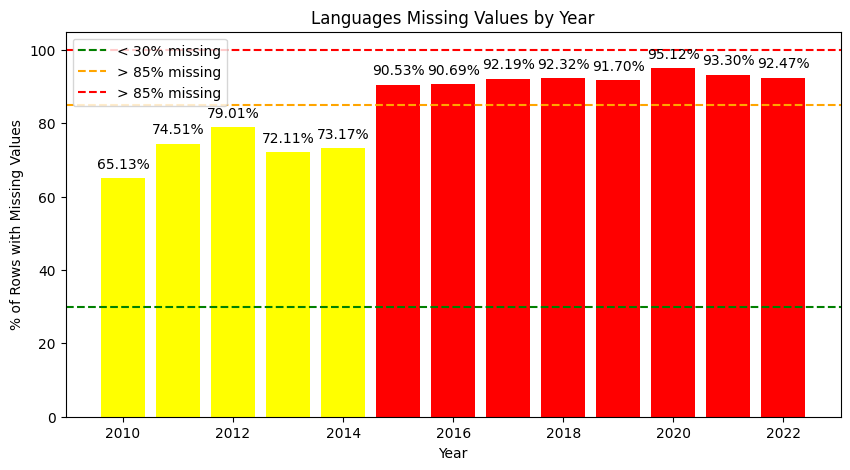

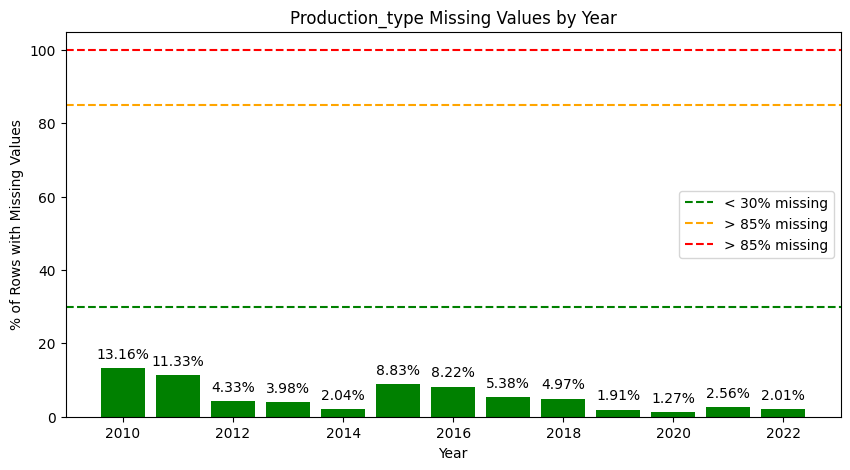

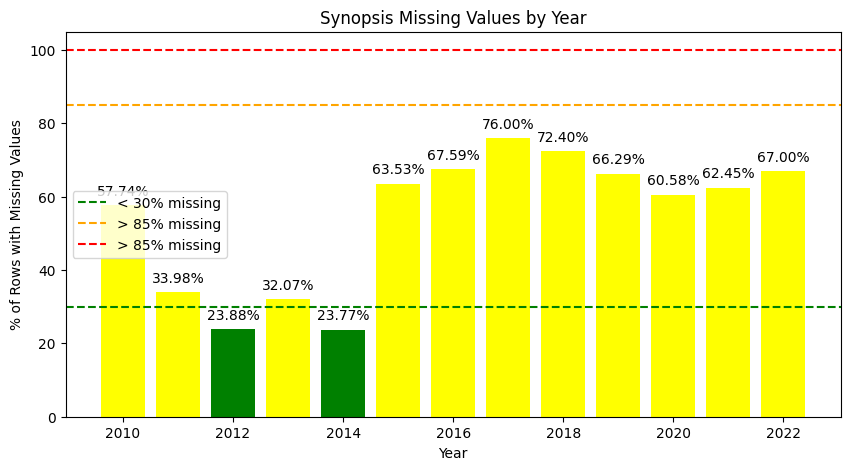

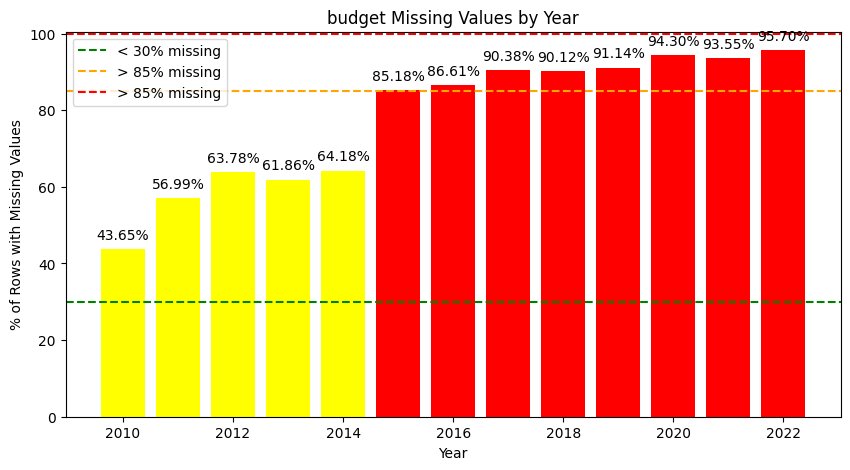

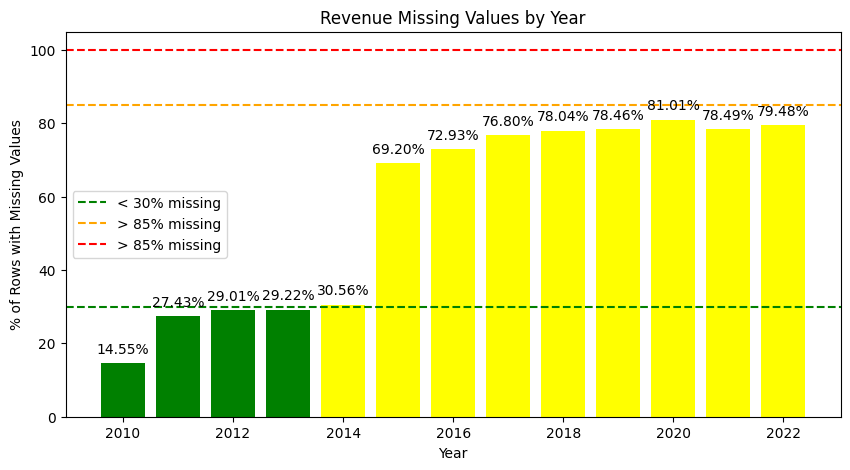

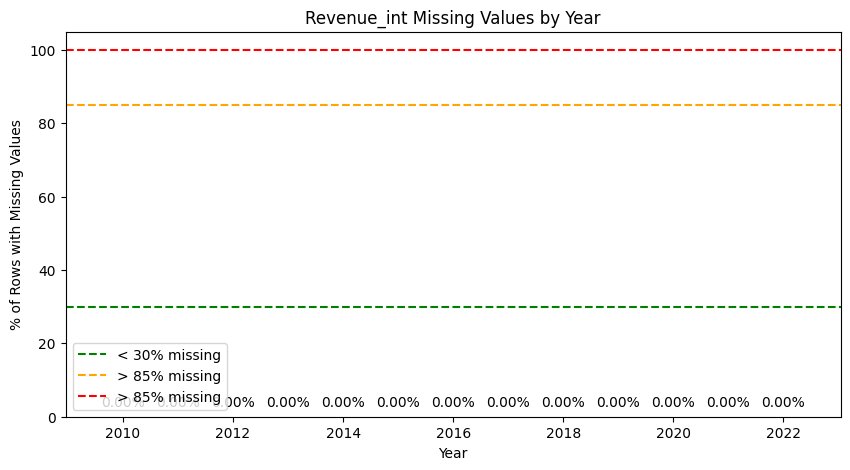

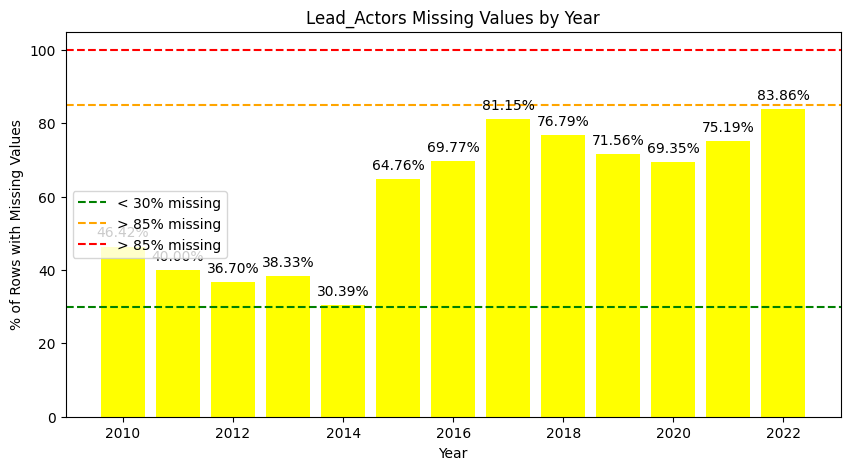

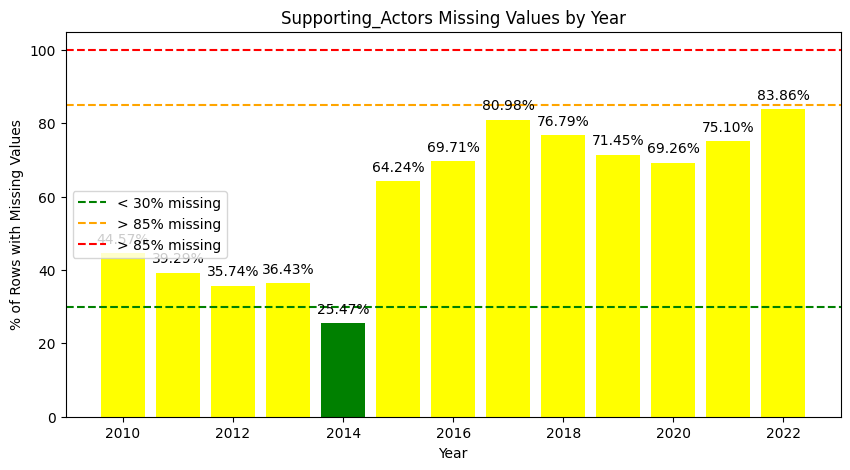

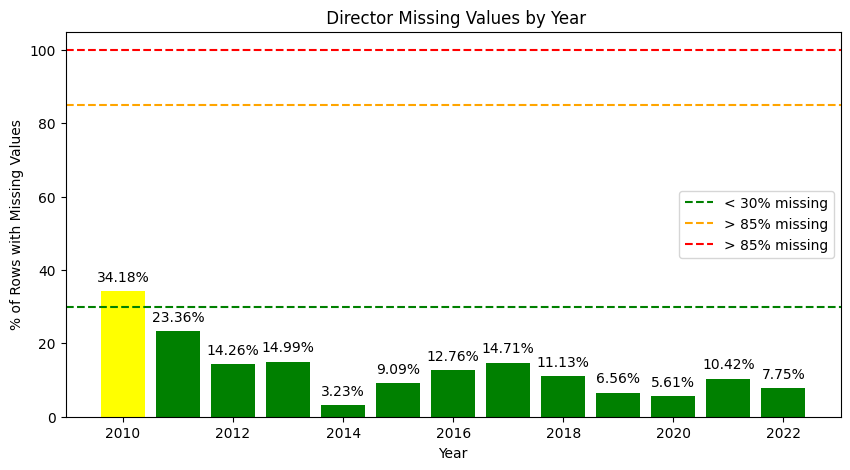

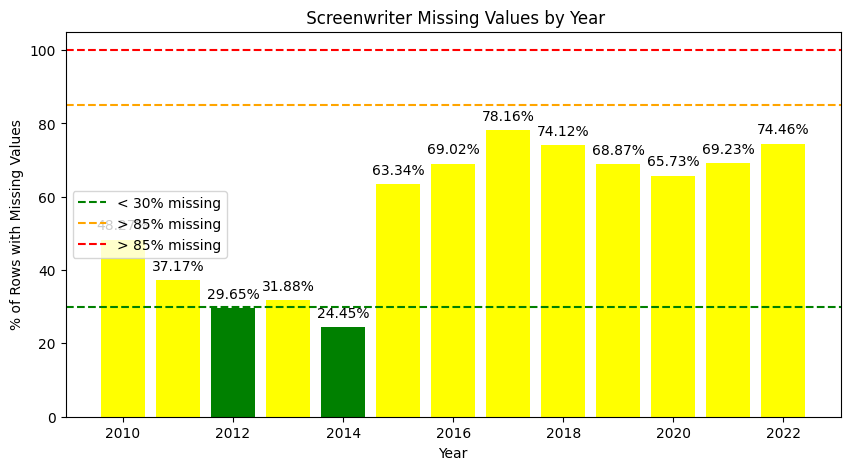

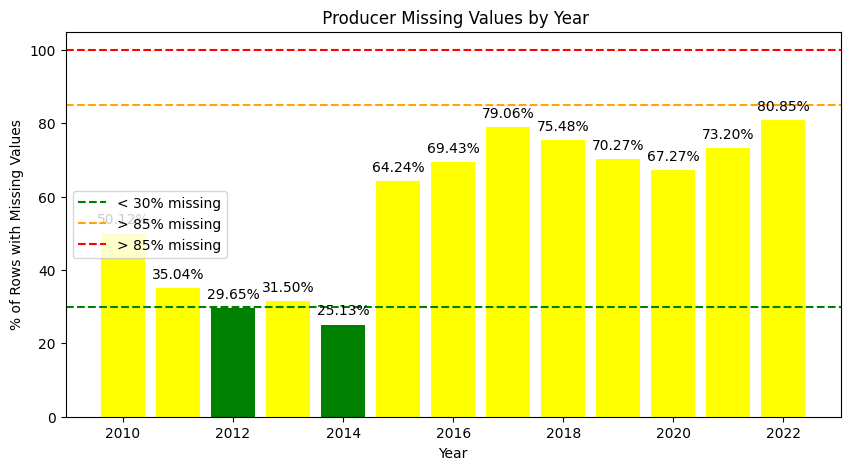

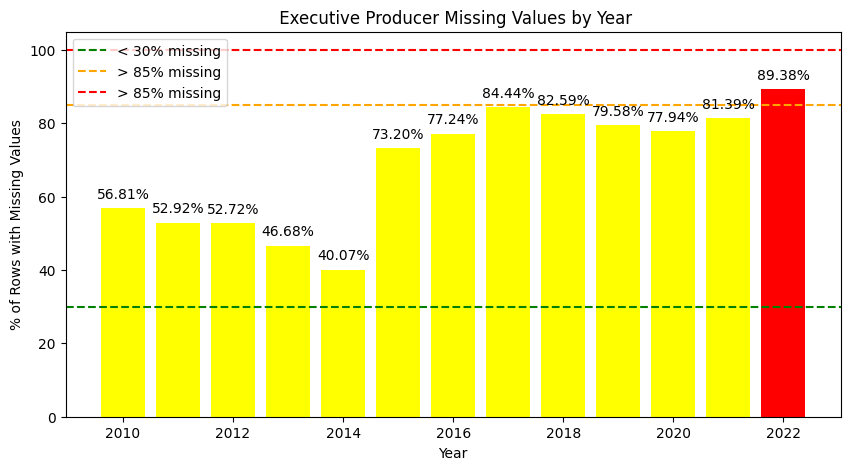

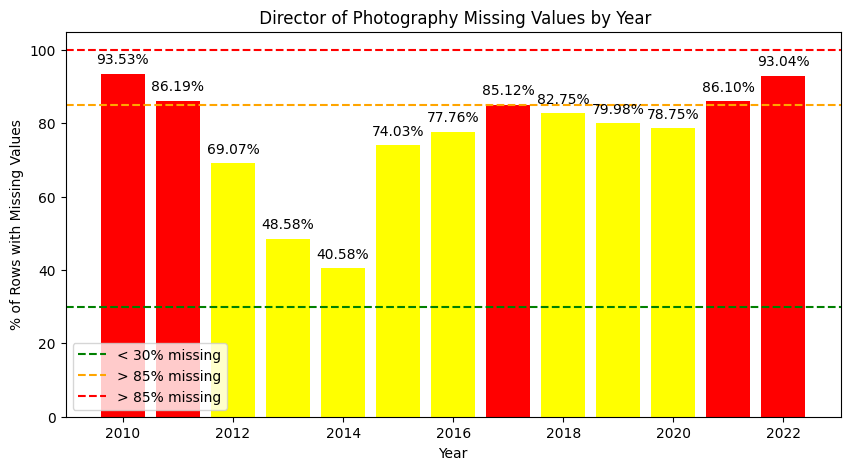

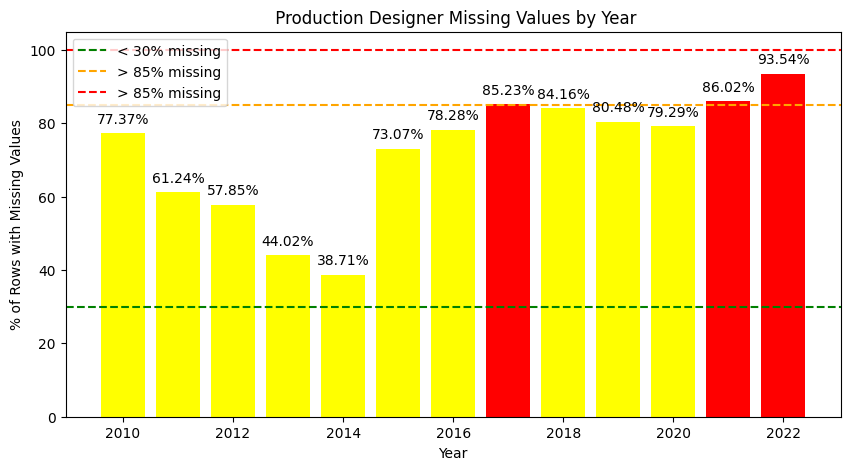

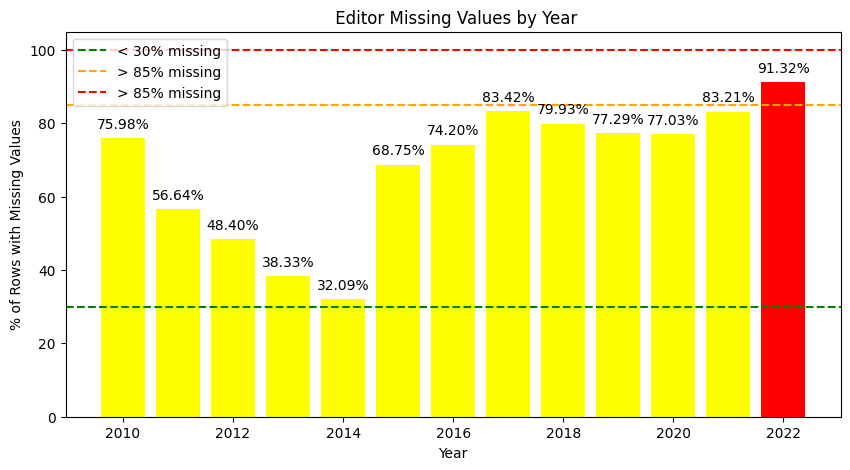

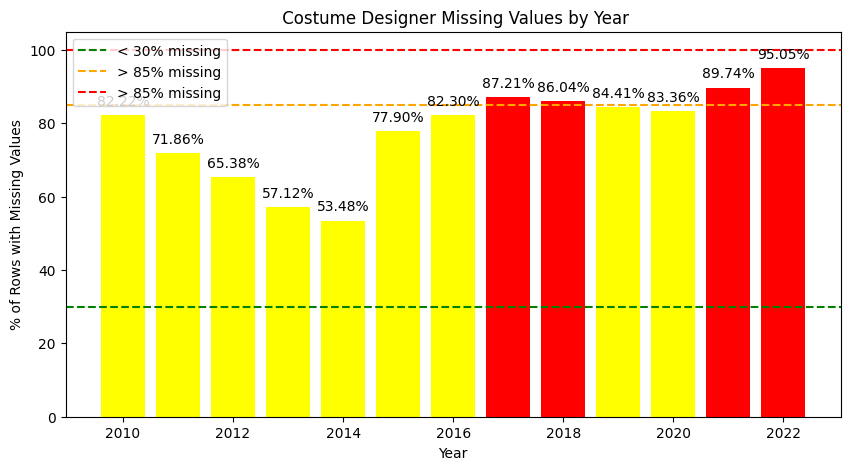

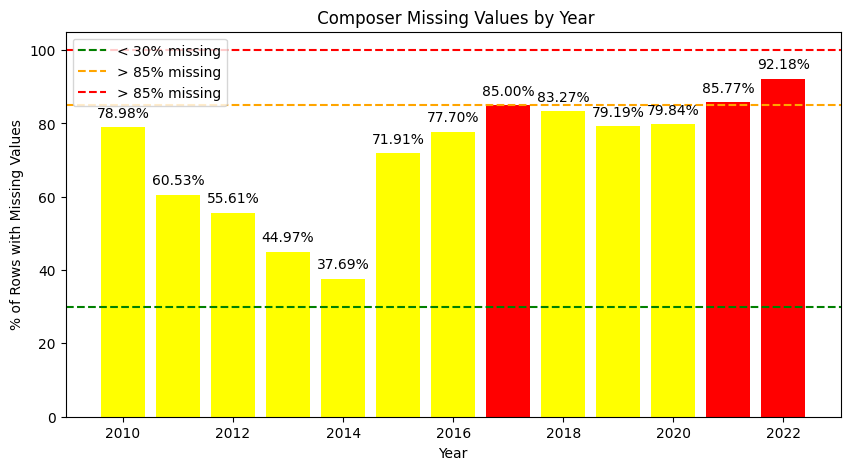

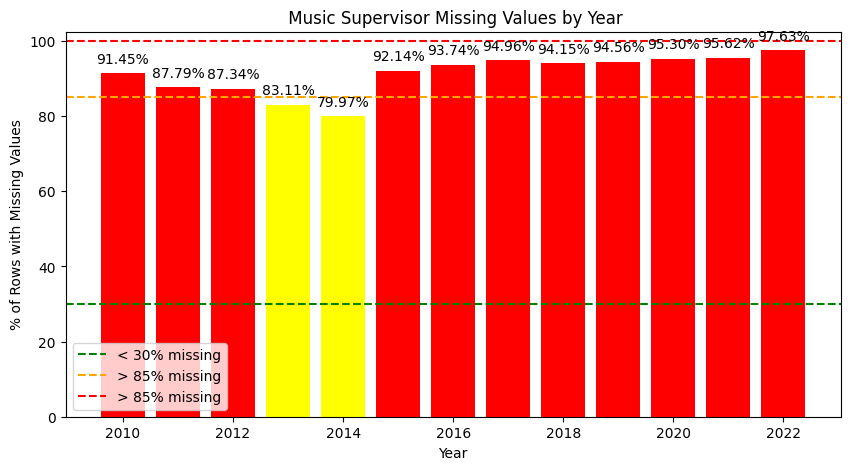

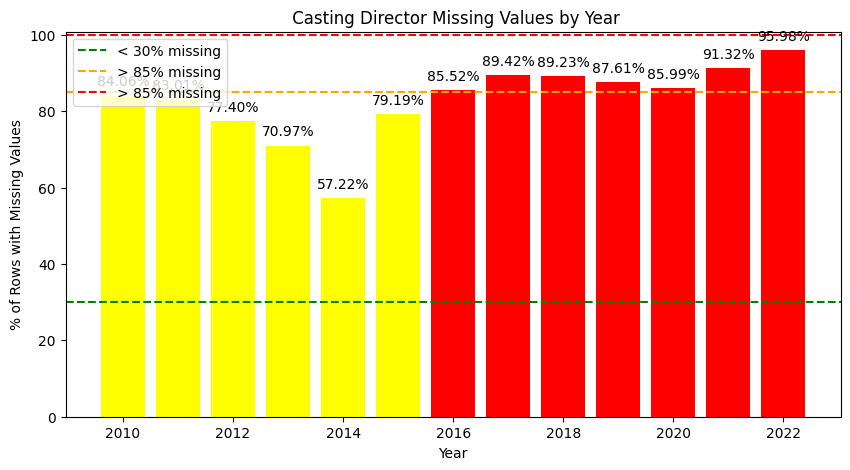

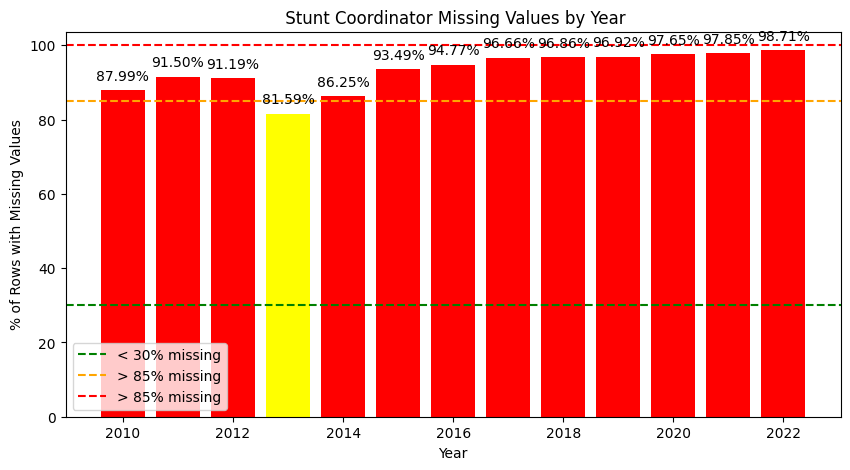

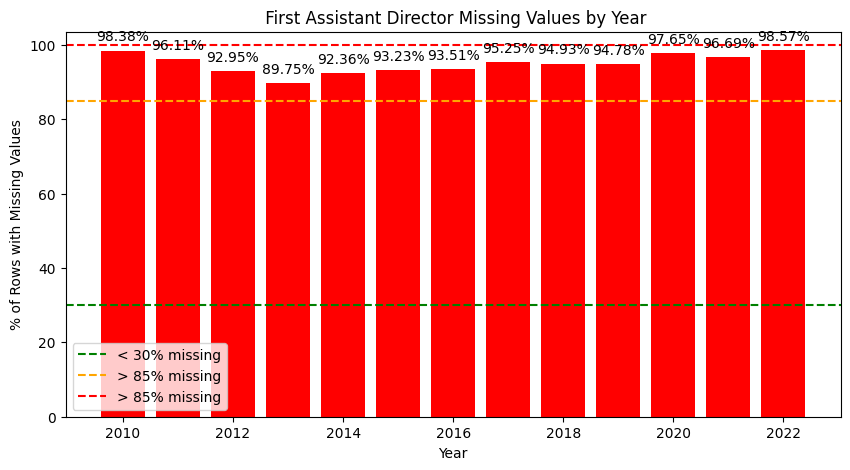

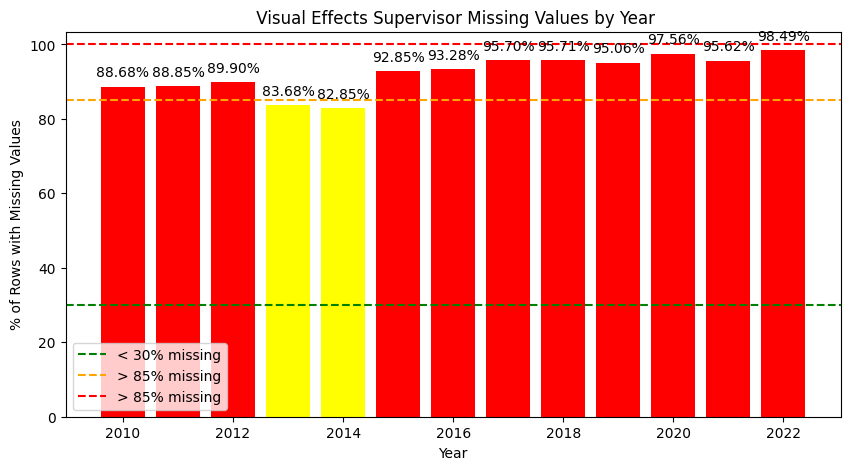

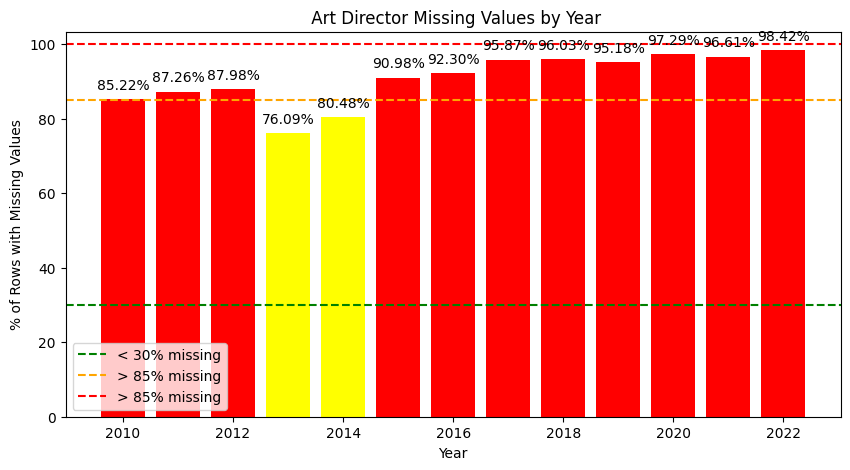

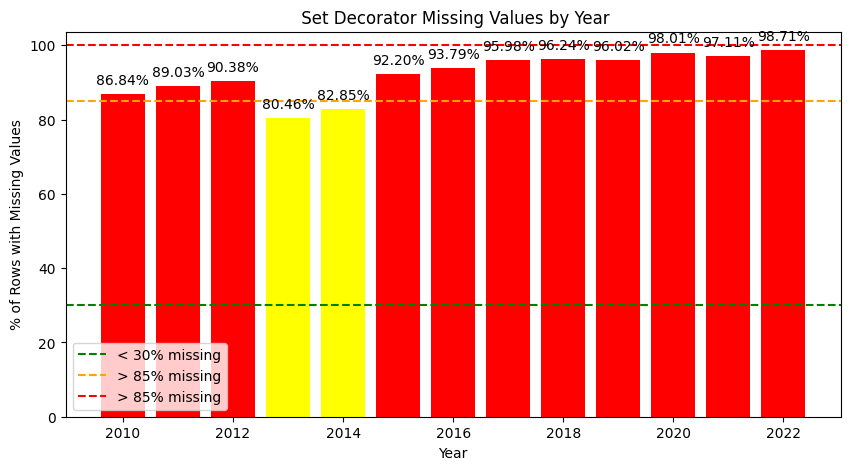

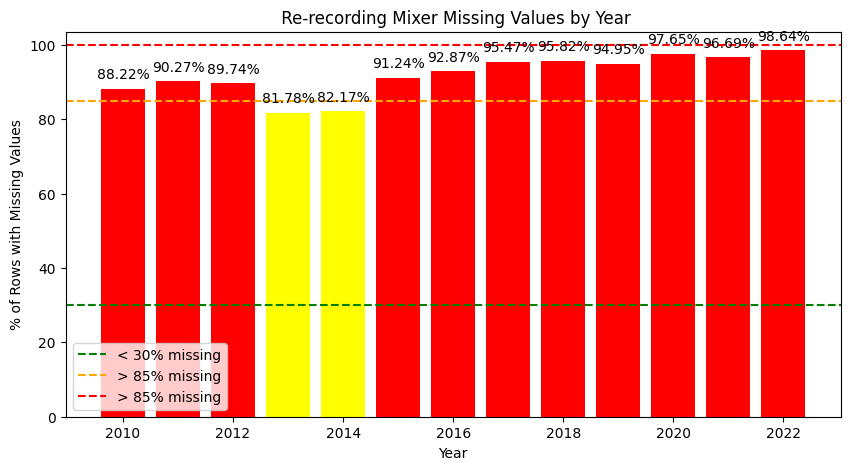

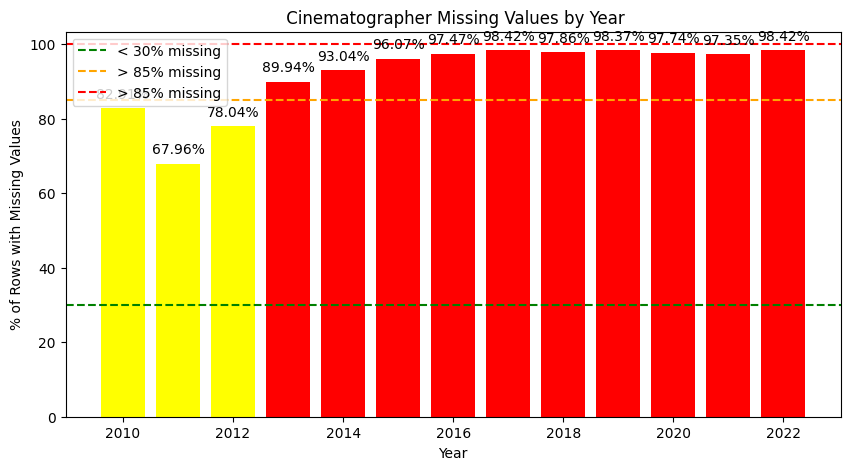

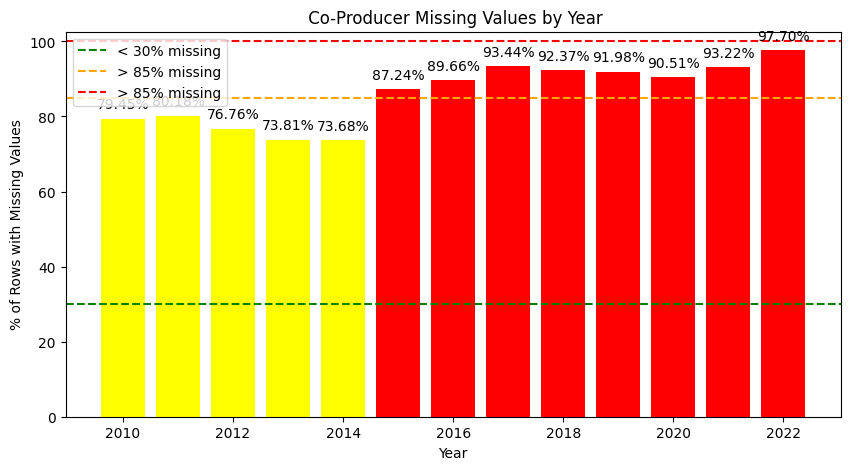

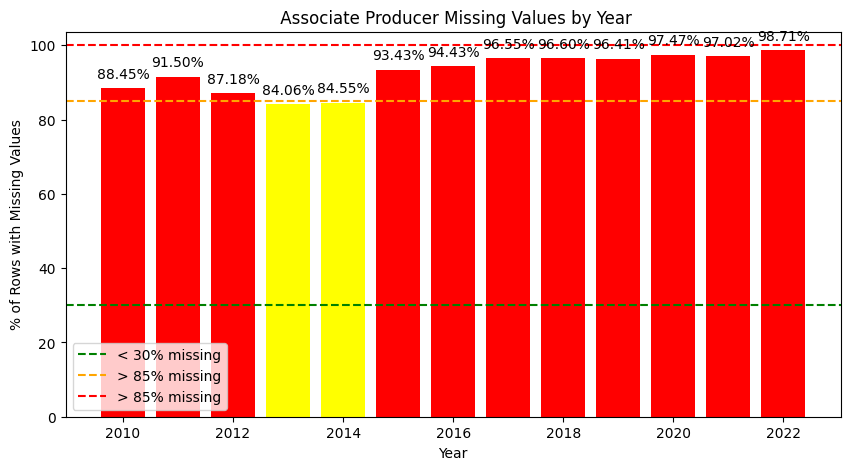

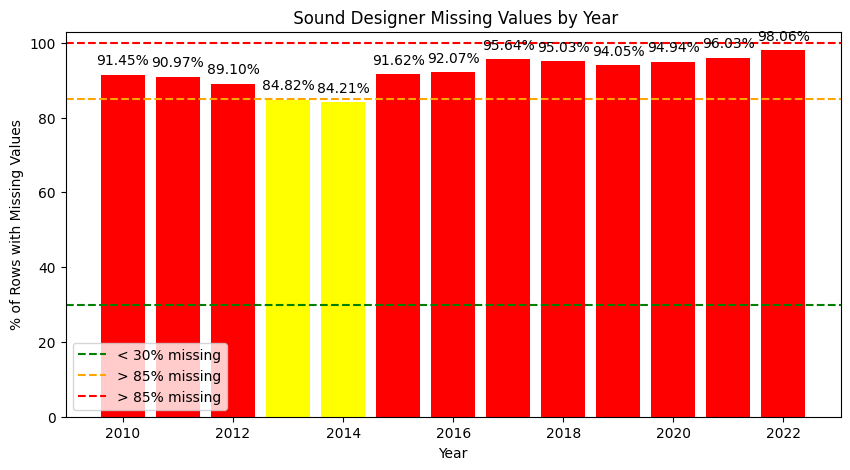

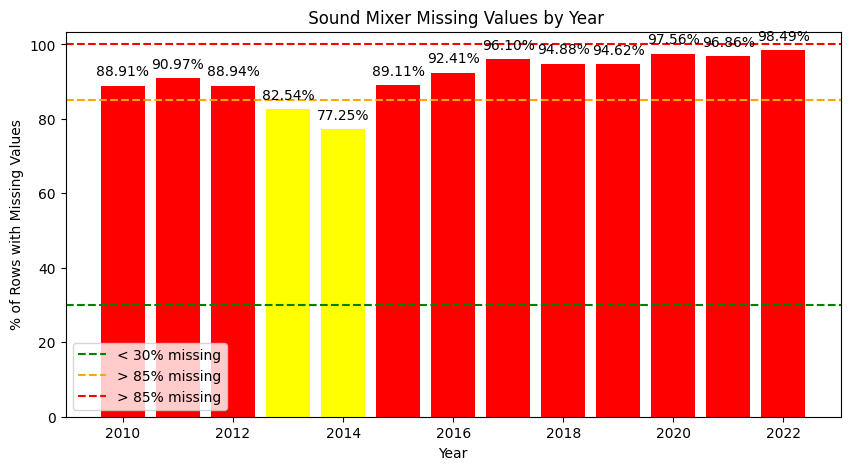

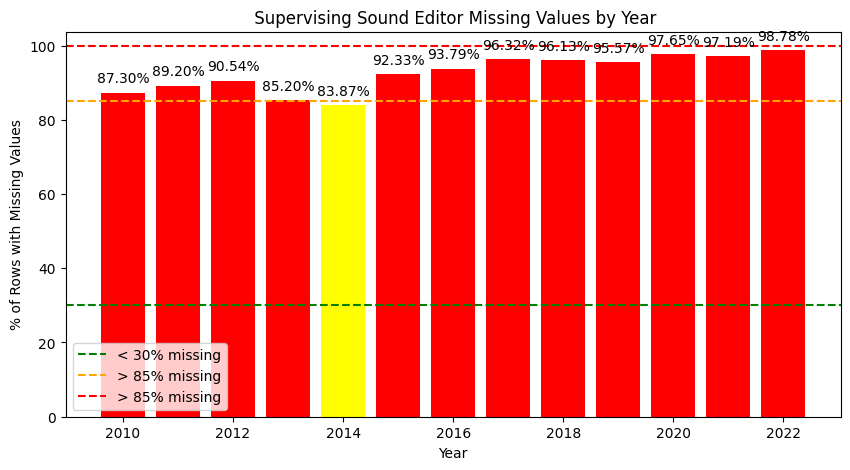

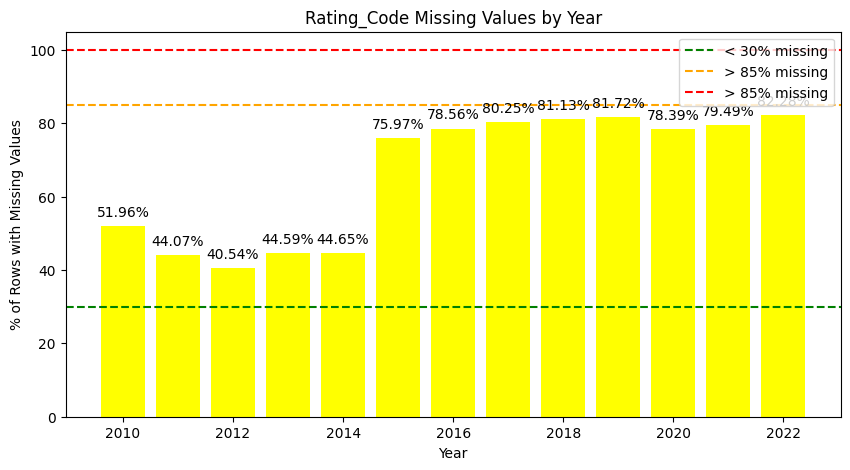

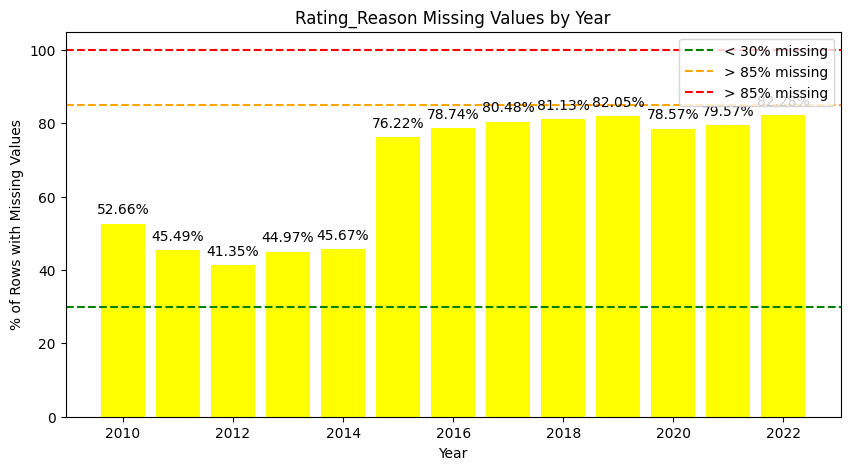

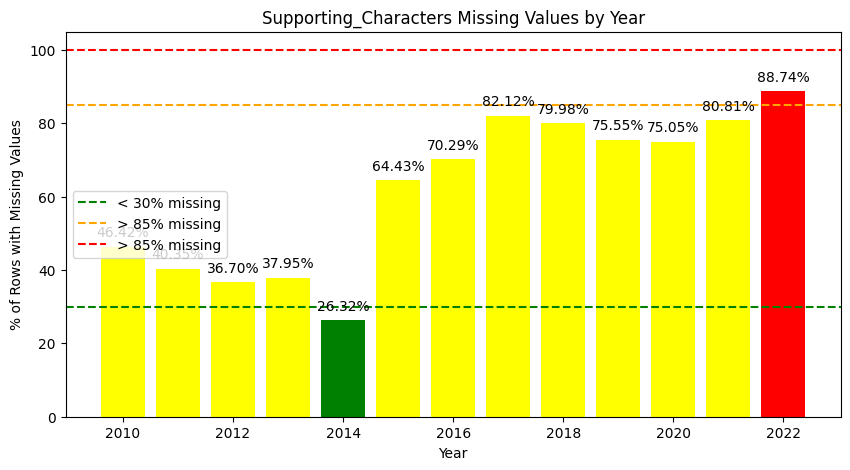

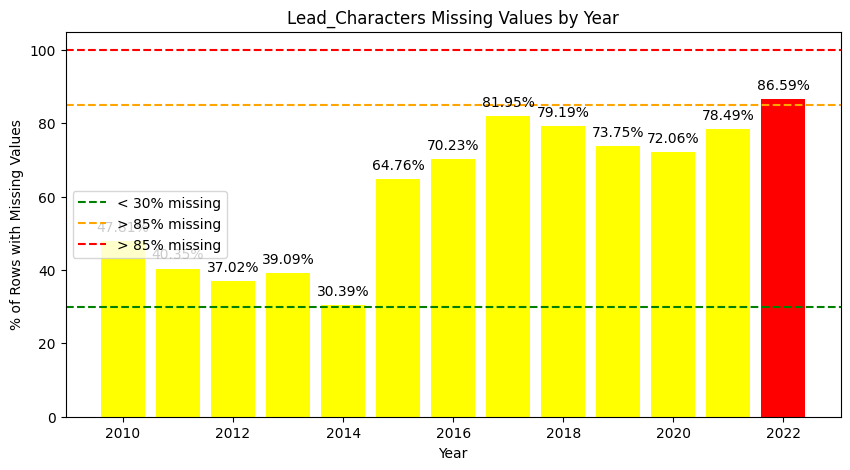

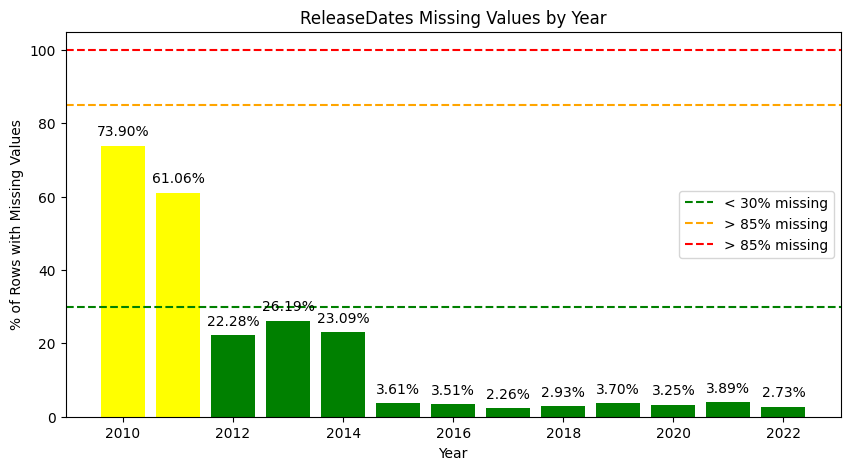

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the threshold values
low_threshold = 30
high_threshold = 85

# Get the list of columns
columns = df.columns

# Loop through each column and create a bar plot for each year
for col in columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(f"{col} Missing Values by Year")
    ax.set_xlabel("Year")
    ax.set_ylabel("% of Rows with Missing Values")
    years = df['year _x'].unique()
    missing_pct = []
    for year in years:
        year_data = df[df['year _x']==year]
        total = len(year_data)
        missing = year_data[col].isnull().sum()
        pct = missing / total * 100
        missing_pct.append(pct)
    ax.bar(years, missing_pct, color=['yellow' if low_threshold<=pct<=high_threshold else 'red' if pct>high_threshold else 'green' for pct in missing_pct])
    ax.axhline(y=low_threshold, color='green', linestyle='--', label=f'< {low_threshold}% missing')
    ax.axhline(y=high_threshold, color='orange', linestyle='--', label=f'> {high_threshold}% missing')
    ax.axhline(y=100, color='red', linestyle='--', label=f'> {high_threshold}% missing')
    ax.legend()
    
    # Add the missing values count and percentage to the plot
    for i, year in enumerate(years):
        ax.annotate(f"{missing_pct[i]:.2f}%", xy=(year, missing_pct[i]), xytext=(0, 5),
                    textcoords='offset points', ha='center', va='bottom')
    
    plt.show()




# **Filtered by rating**

In [ ]:
#Filtering Considering Rating: 

df_with_rating = df[df['Rating'].notnull()]

print(df_with_rating.info())
print(df_with_rating.head())
#General Info : 4031 rows / 43 columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4031 entries, 6 to 15198
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       4031 non-null   object 
 1   Description                 4031 non-null   object 
 2   year _x                     4031 non-null   int64  
 3   Running_Time_x              3876 non-null   object 
 4   Keywords_x                  3636 non-null   object 
 5   Rating                      4031 non-null   object 
 6   CreativeType                3987 non-null   object 
 7   Source                      3989 non-null   object 
 8   Genre                       4006 non-null   object 
 9   Languages                   1487 non-null   object 
 10  Production_type             4002 non-null   object 
 11  Synopsis                    3585 non-null   object 
 12  budget                      1996 non-null   float64
 13  Revenue                     3211

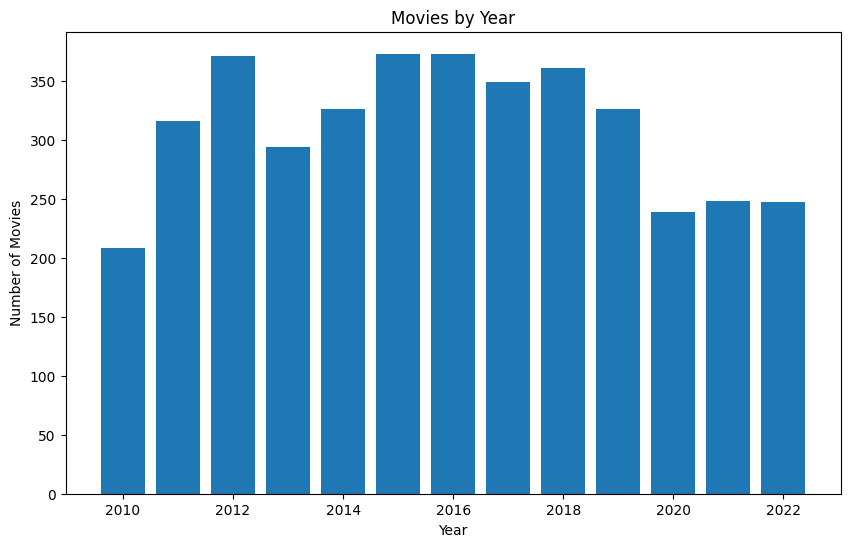

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

year_counts = df_with_rating['year _x'].value_counts()

# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))  # Set a smaller figure size
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies by Year')



plt.show()


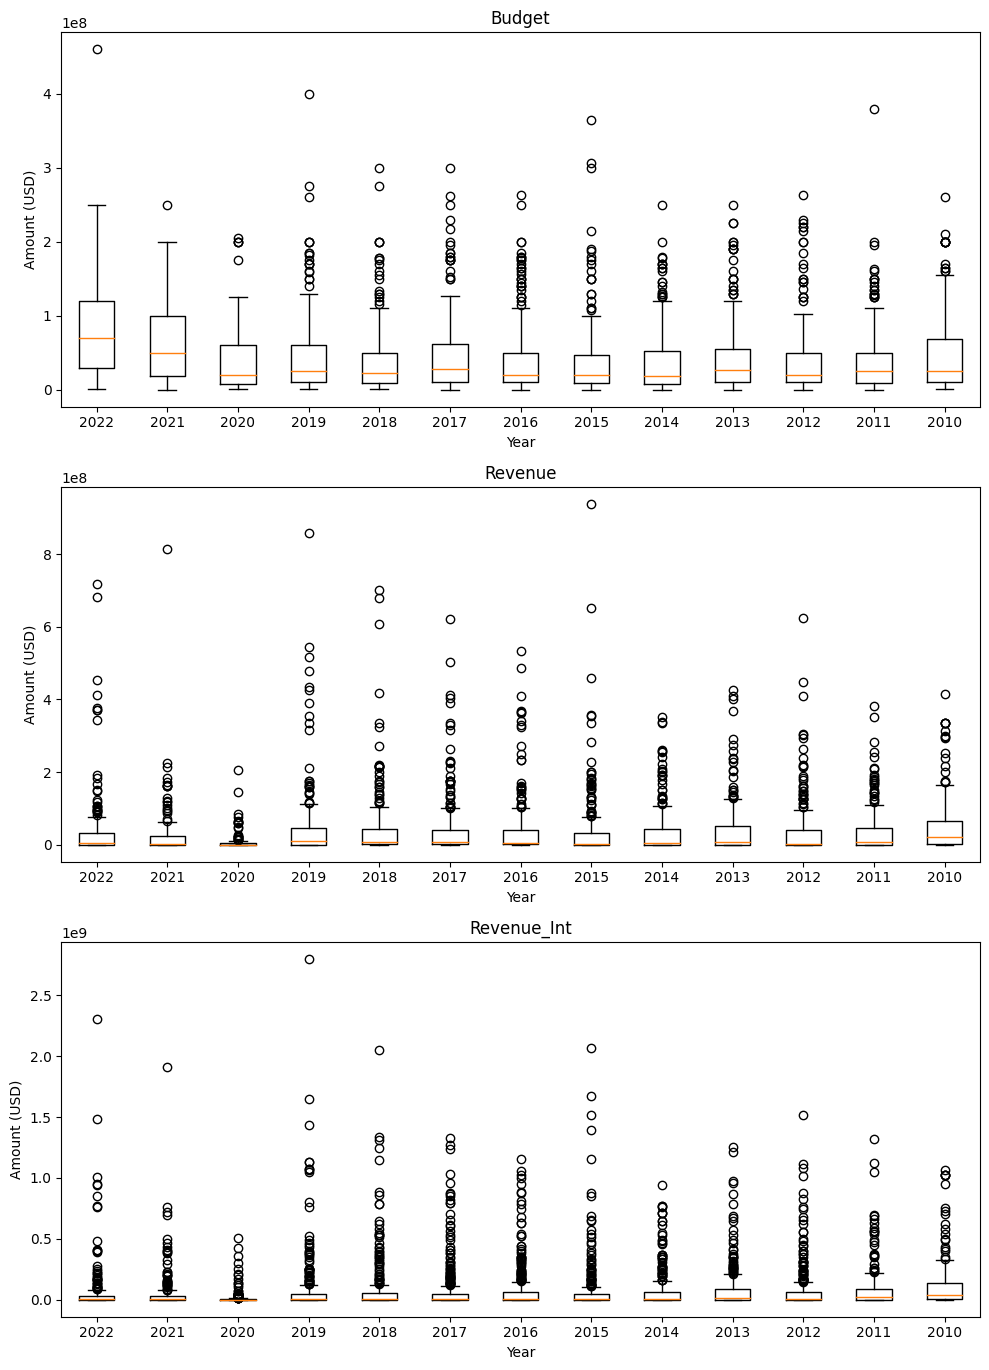

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set up the figure with 3 subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Loop through each subplot and create a box plot
for i, col in enumerate(['budget', 'Revenue', 'Revenue_int']):
    ax = axes[i]
    ax.set_title(col.title())
    ax.set_ylabel('Amount (USD)')
    ax.set_xlabel('Year')
    data = []
    for year in df_with_rating['year _x'].unique():
        year_data = df_with_rating[df_with_rating['year _x']==year][col]
        data.append(year_data.dropna().values)
    ax.boxplot(data)
    ax.set_xticklabels(df_with_rating['year _x'].unique())

# Adjust the spacing between subplots
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


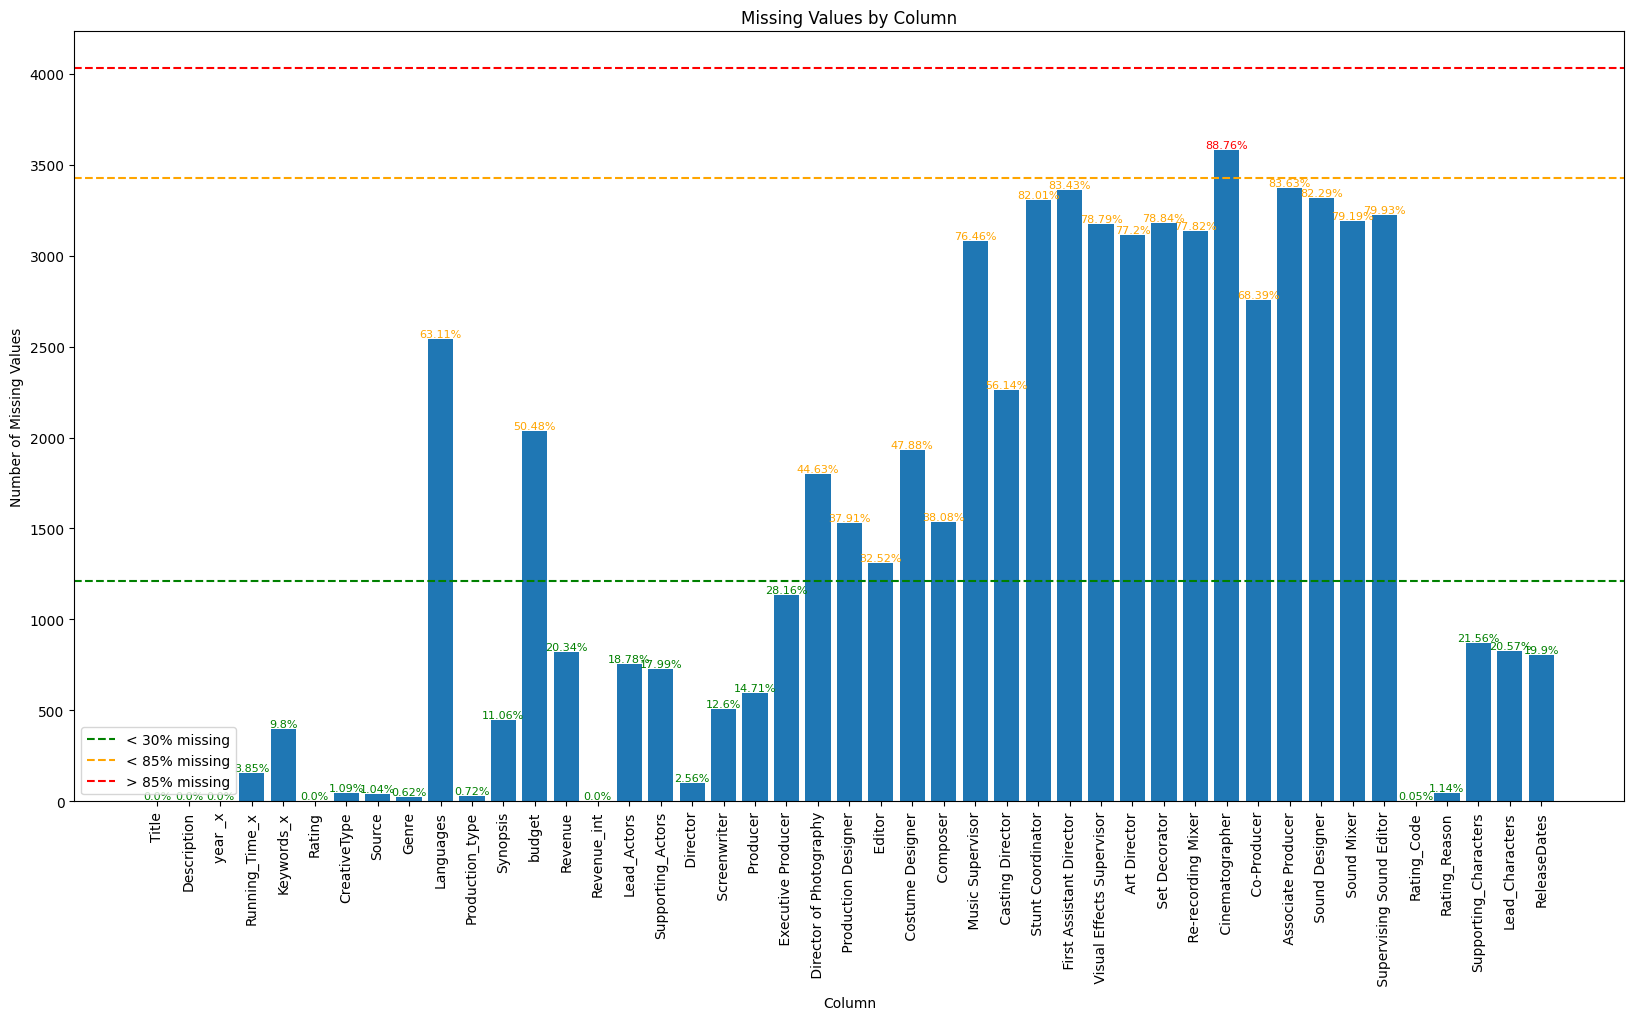

In [ ]:
# Count the number of missing values for each column
missing_values = df_with_rating.isnull().sum()

# Calculate the percentage of missing values for each column
percent_missing = round((missing_values / len(df_with_rating)) * 100, 2)

# Set thresholds for differentiating between low, medium, and high missing values
low_threshold = 30
high_threshold = 85

# Create a bar plot to visualize the results
plt.figure(figsize=(20, 10))  # Set the figure size
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Column')

# Add percentage of missing values as text, and differentiate between low, medium, and high missing values
for i, v in enumerate(percent_missing):
    if v < low_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='green')
    elif v < high_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='orange')
    else:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='red')

# Add horizontal lines to identify the different thresholds
plt.axhline(y=low_threshold*len(df_with_rating)/100, color='green', linestyle='--', label=f'< {low_threshold}% missing')
plt.axhline(y=high_threshold*len(df_with_rating)/100, color='orange', linestyle='--', label=f'< {high_threshold}% missing')
plt.axhline(y=len(df_with_rating), color='red', linestyle='--', label=f'> {high_threshold}% missing')
plt.legend()

plt.show()

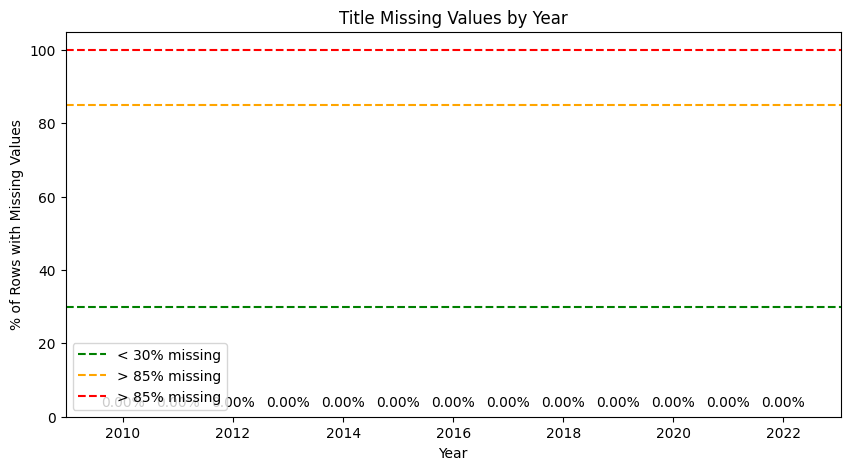

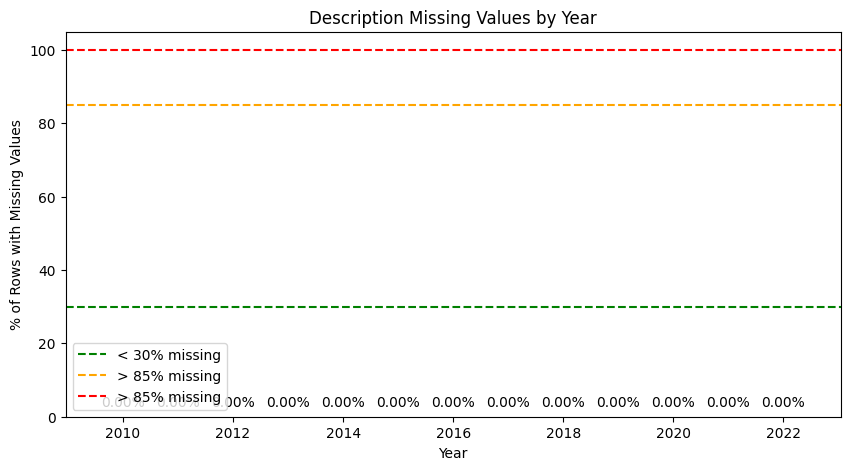

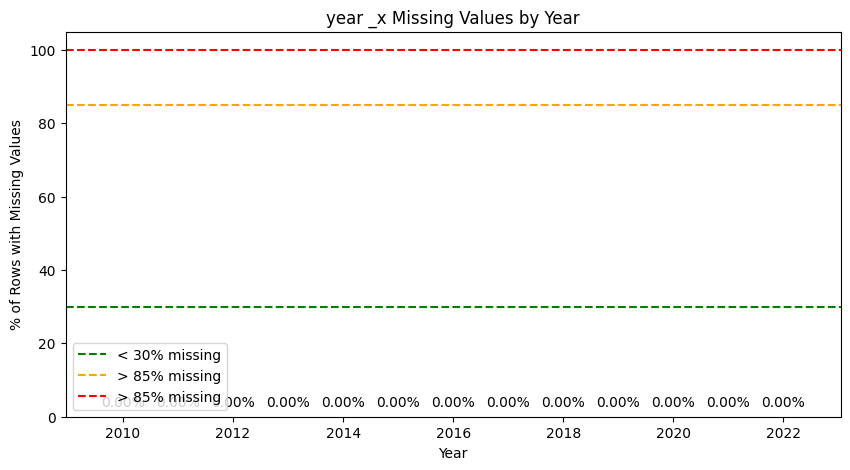

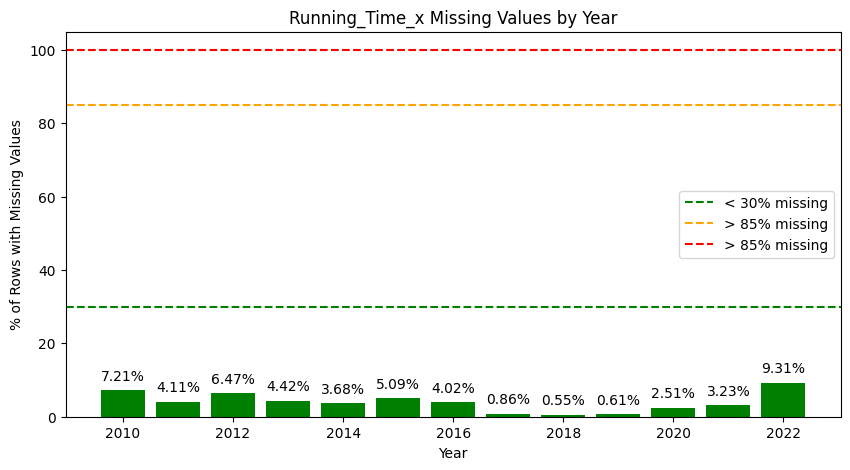

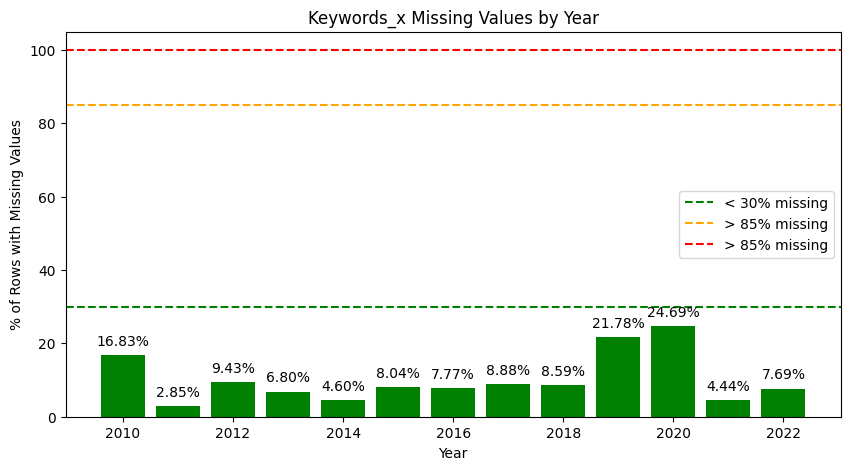

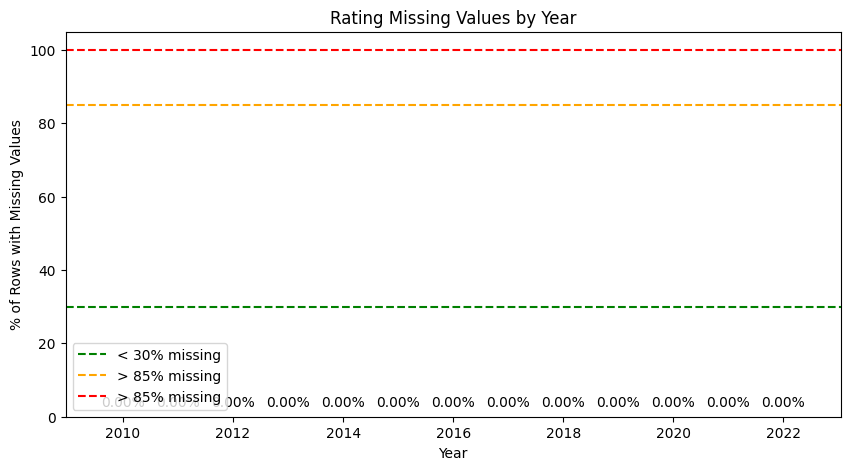

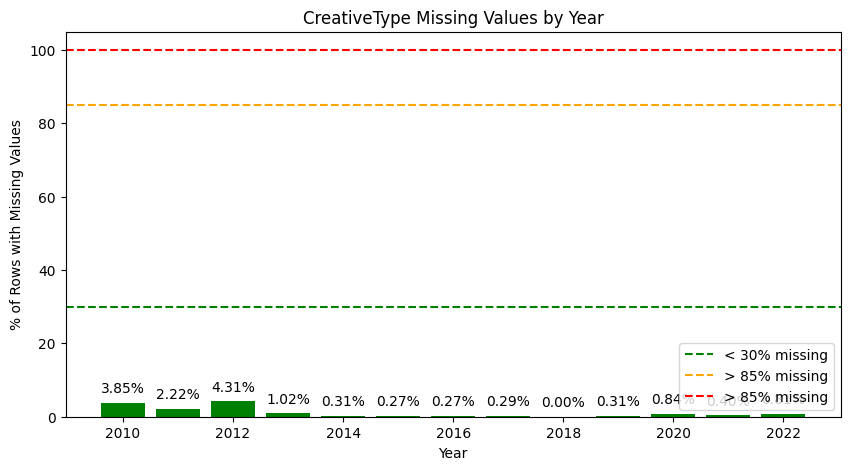

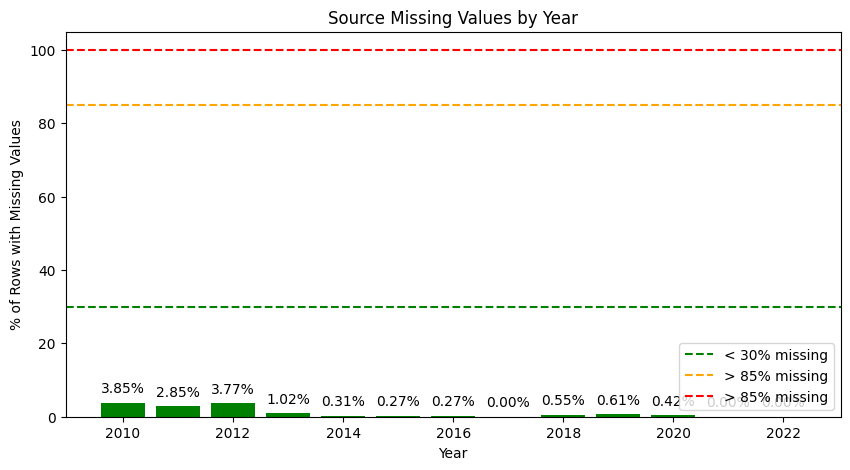

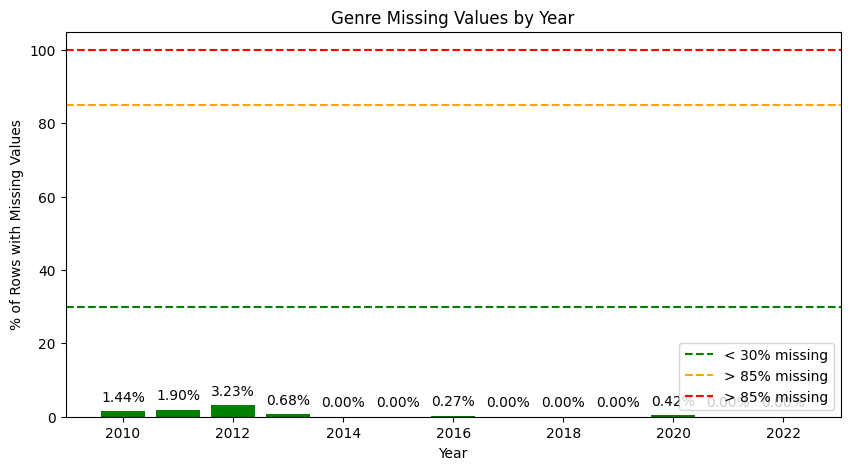

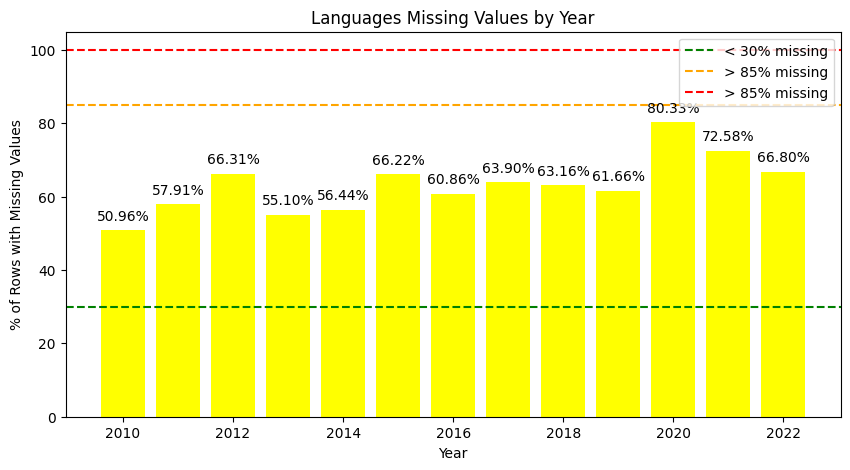

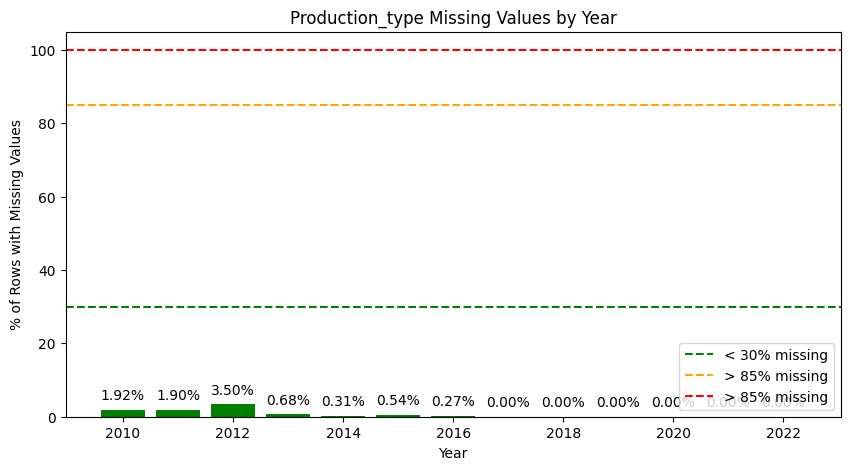

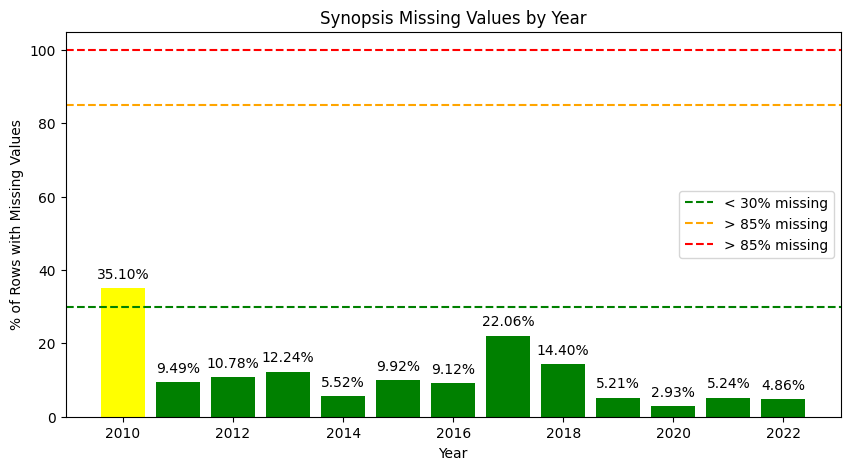

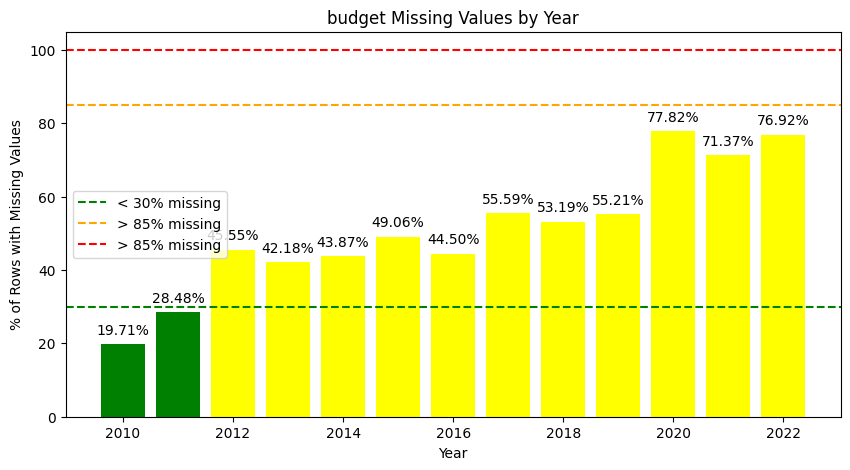

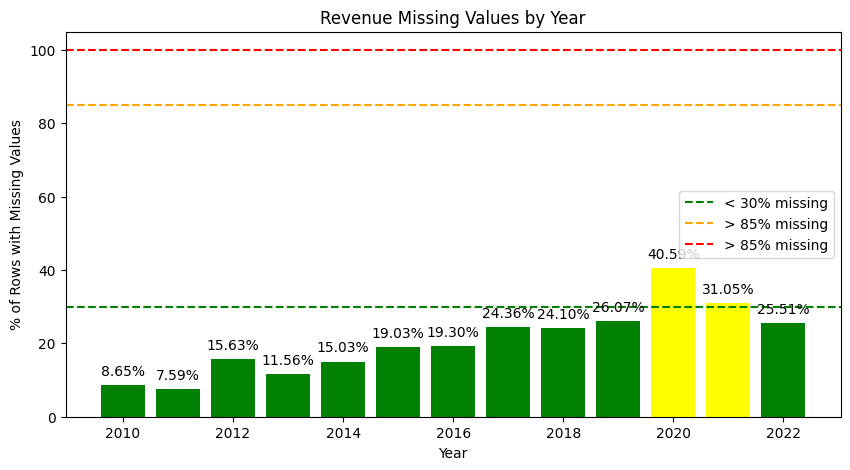

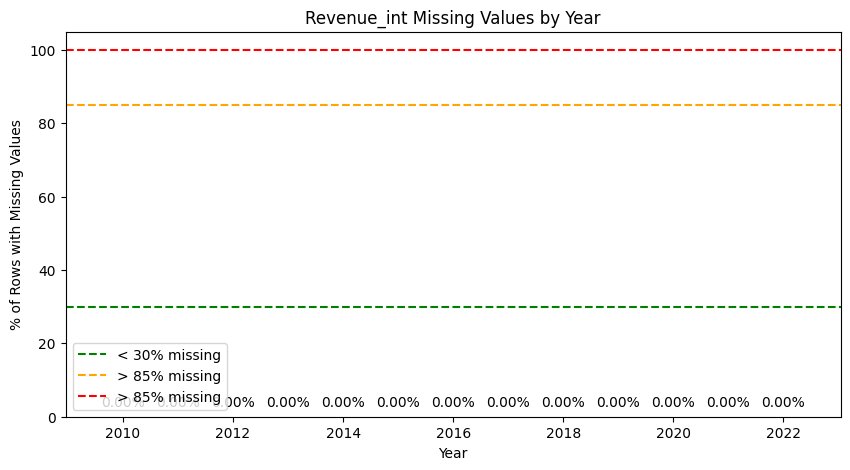

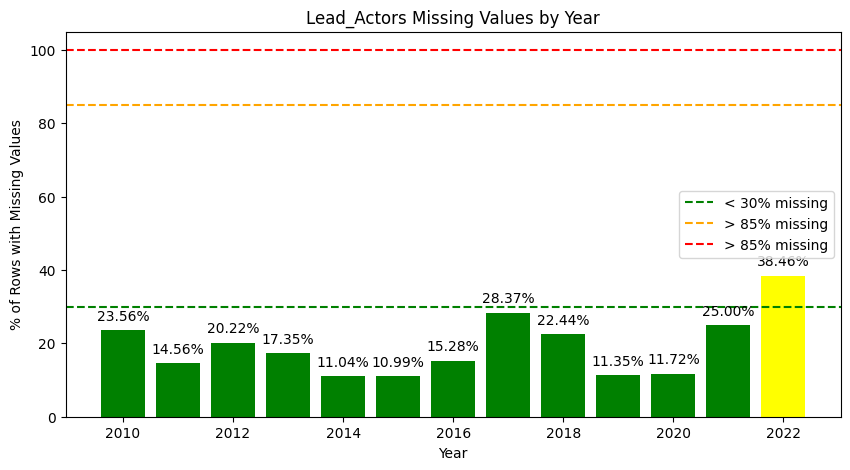

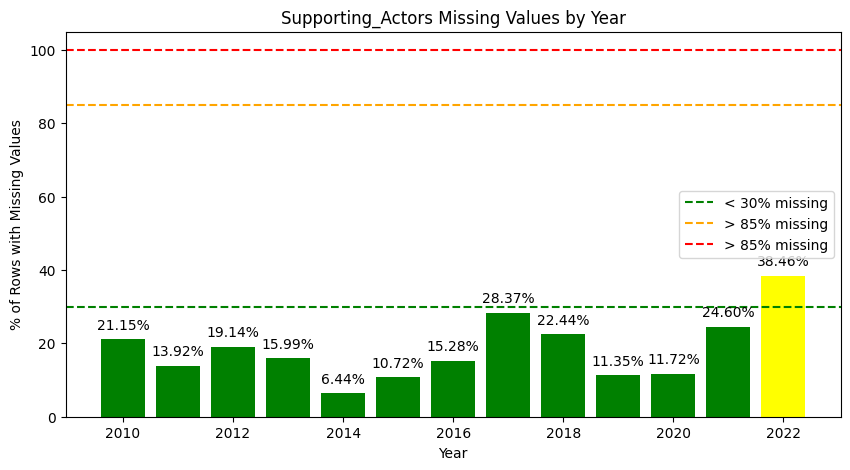

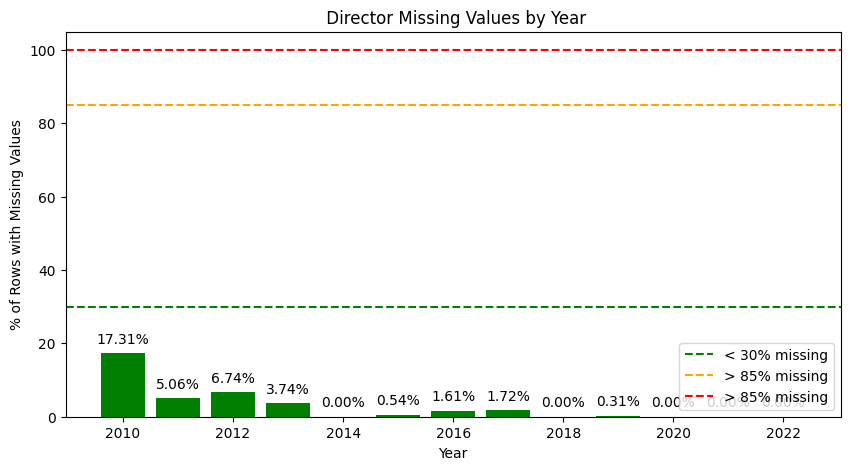

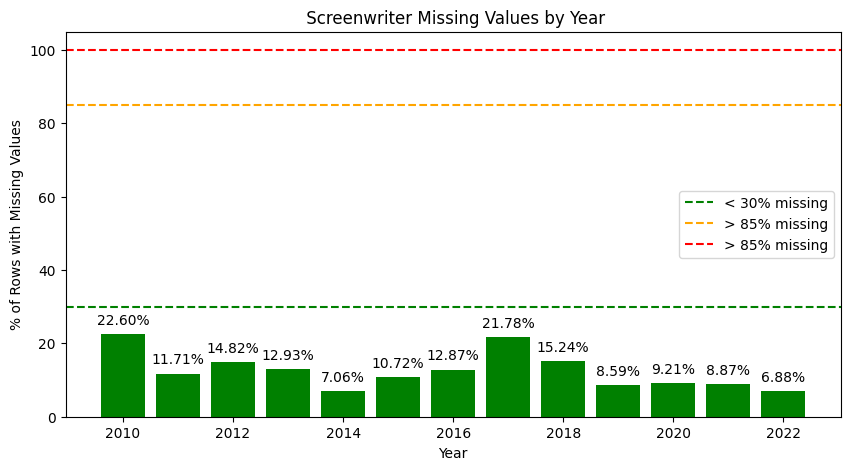

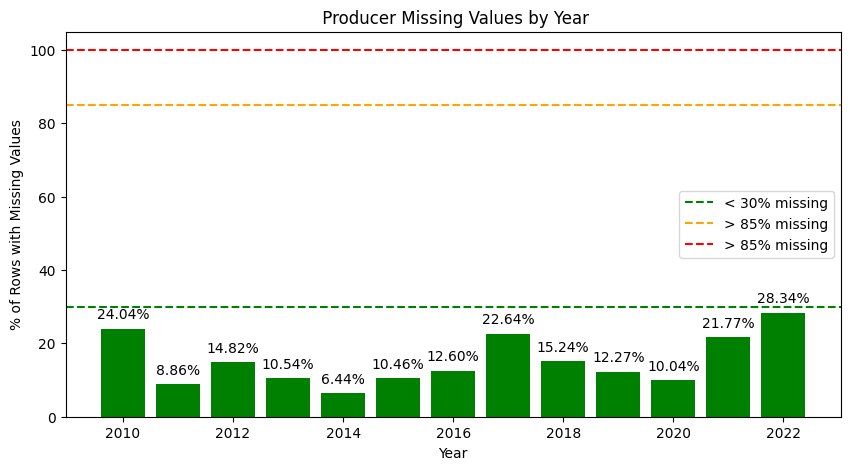

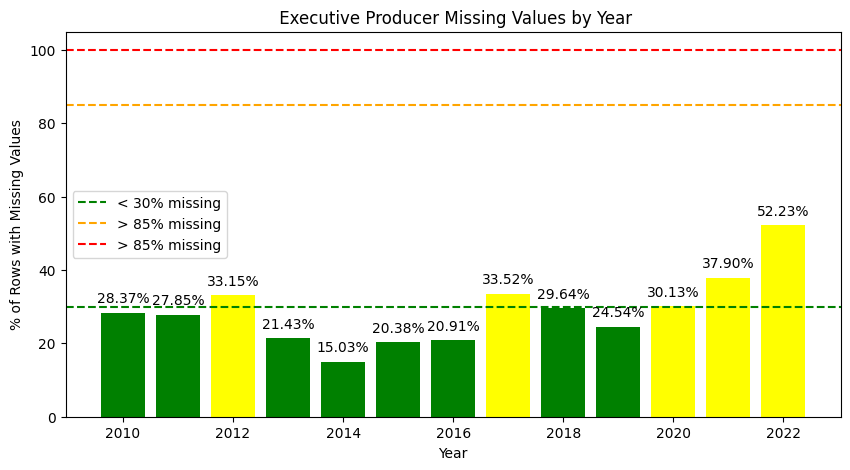

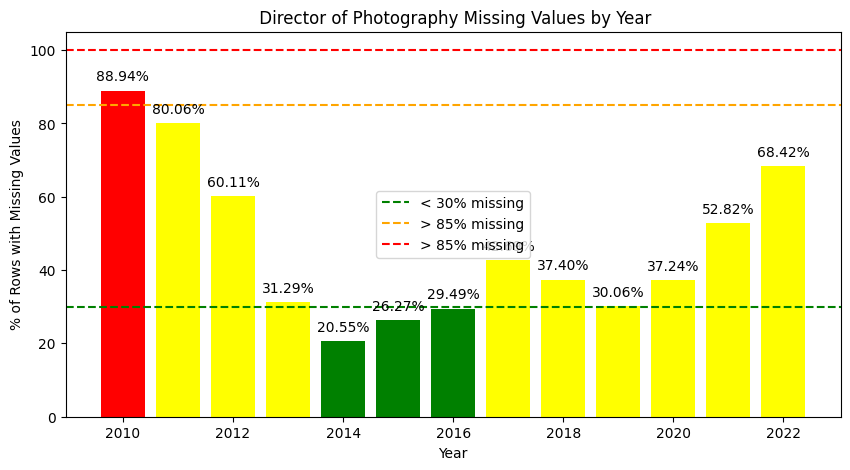

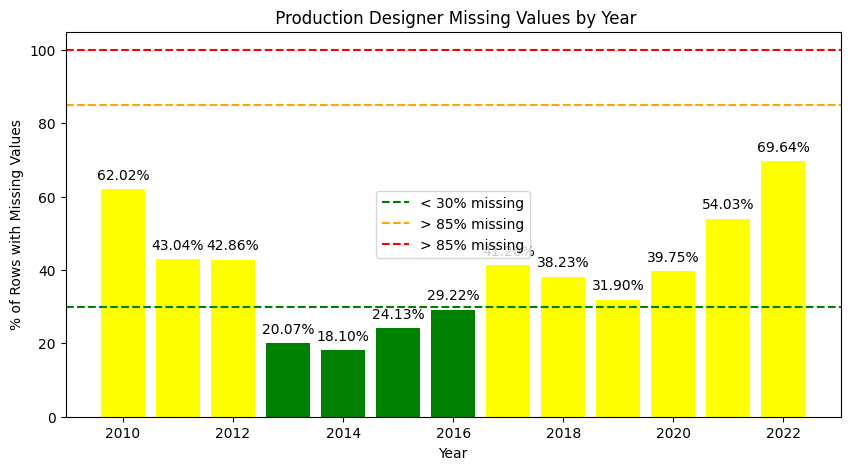

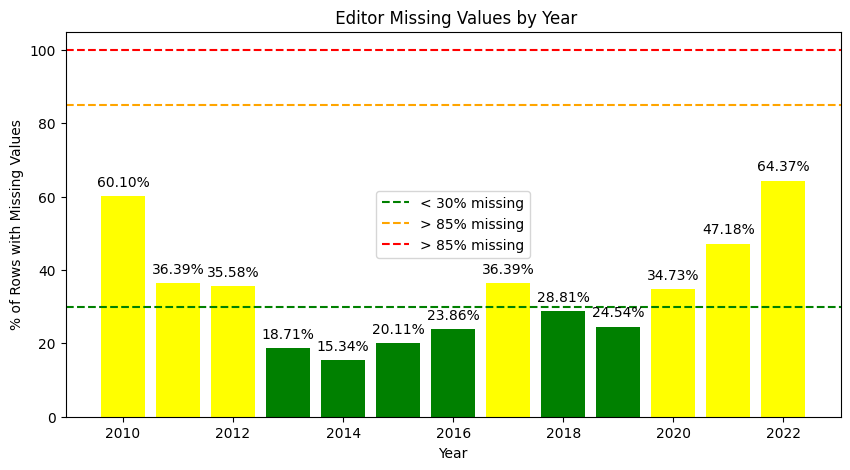

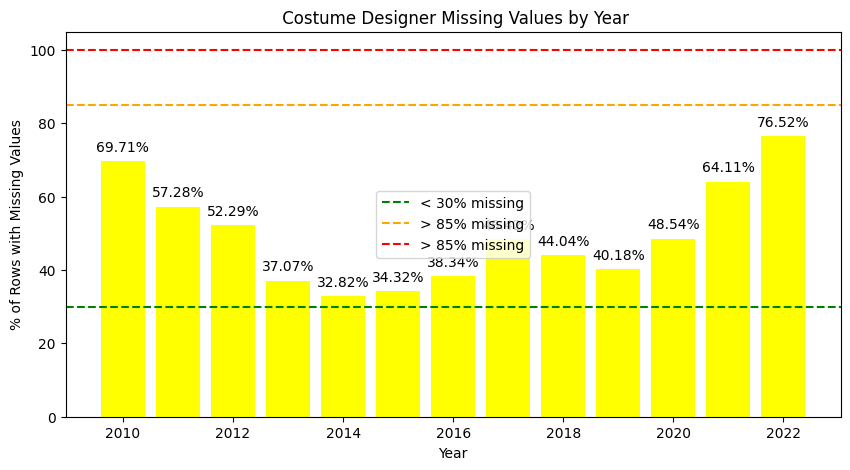

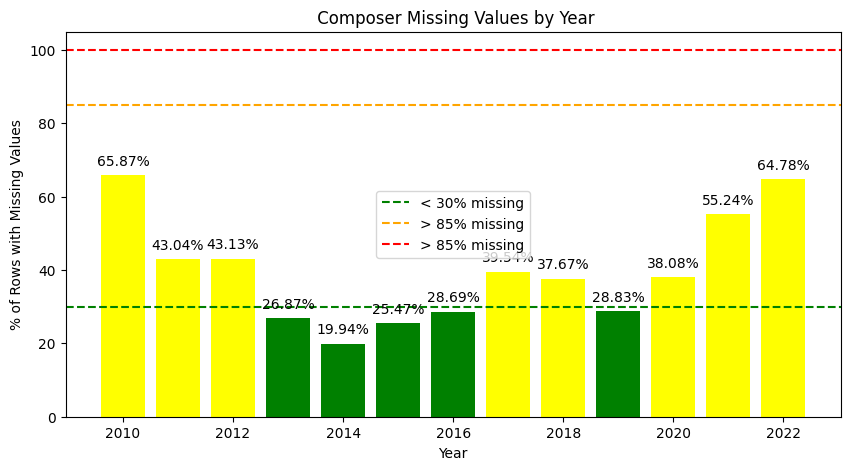

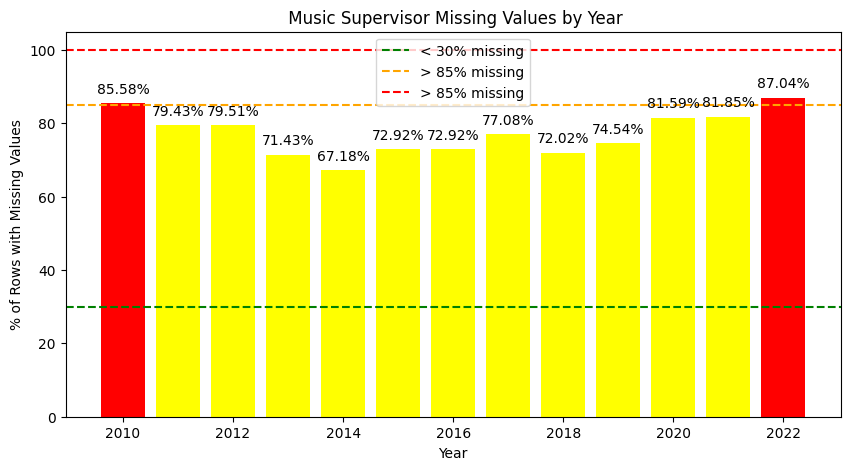

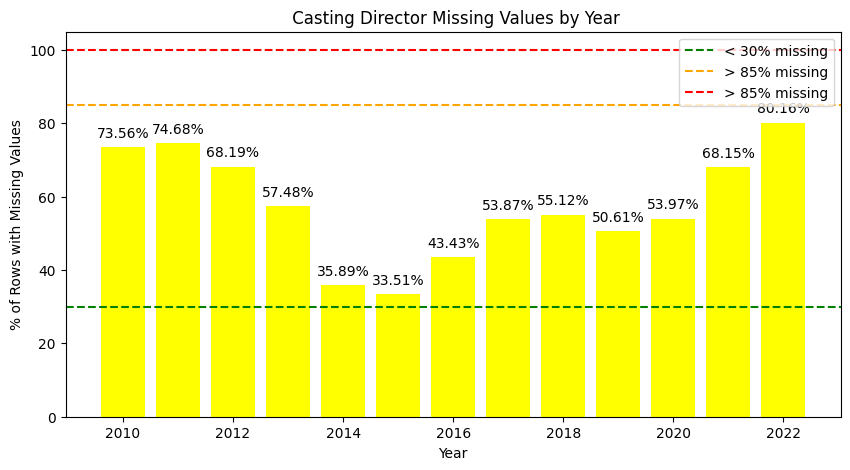

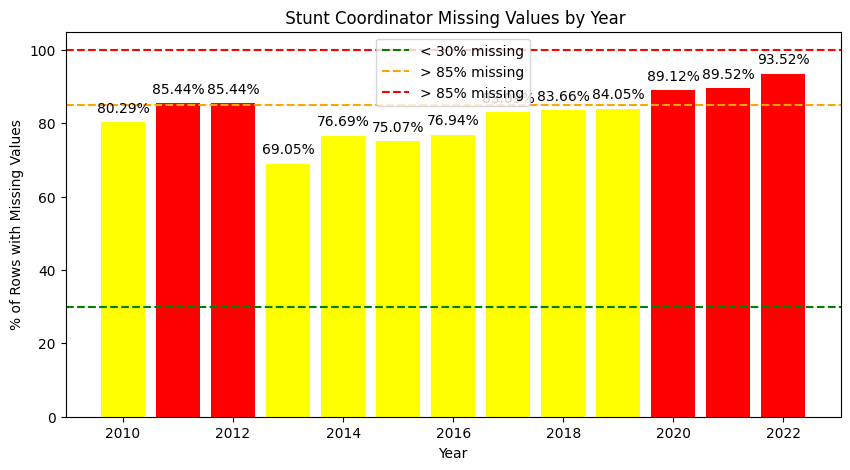

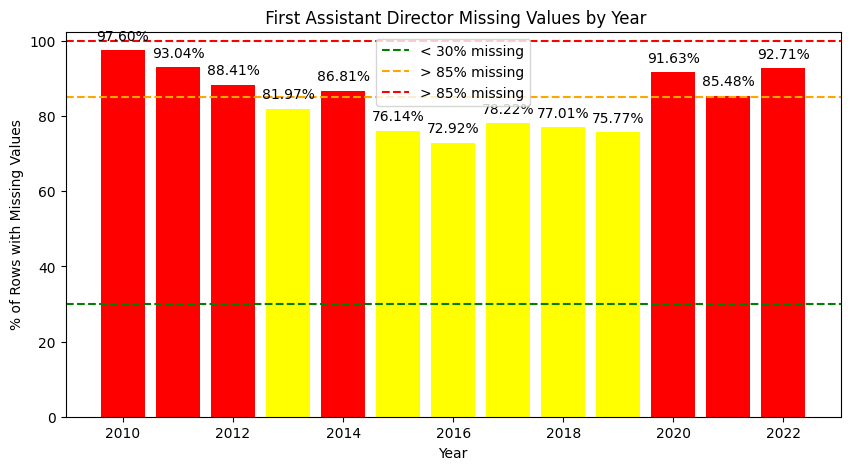

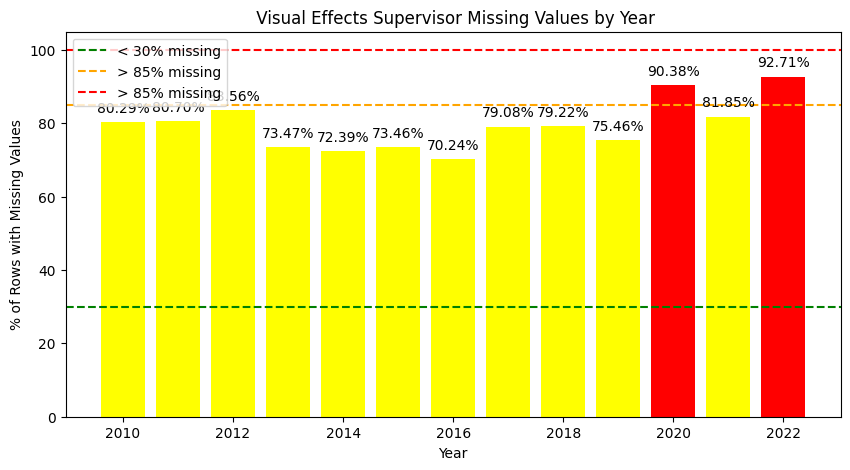

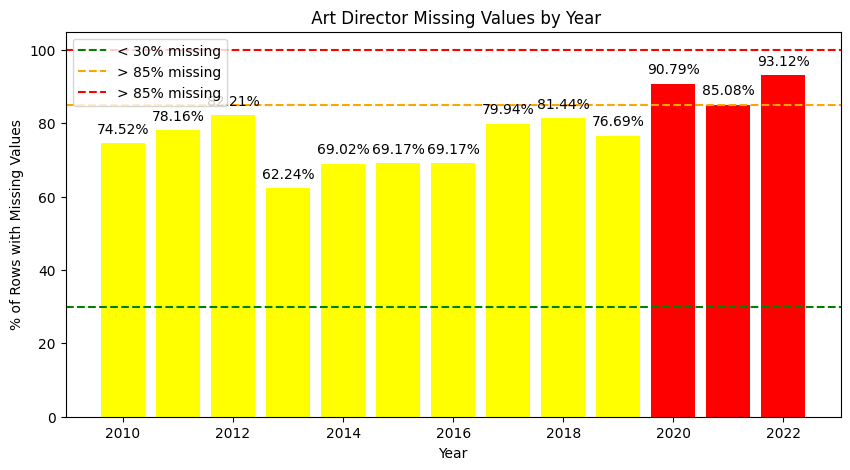

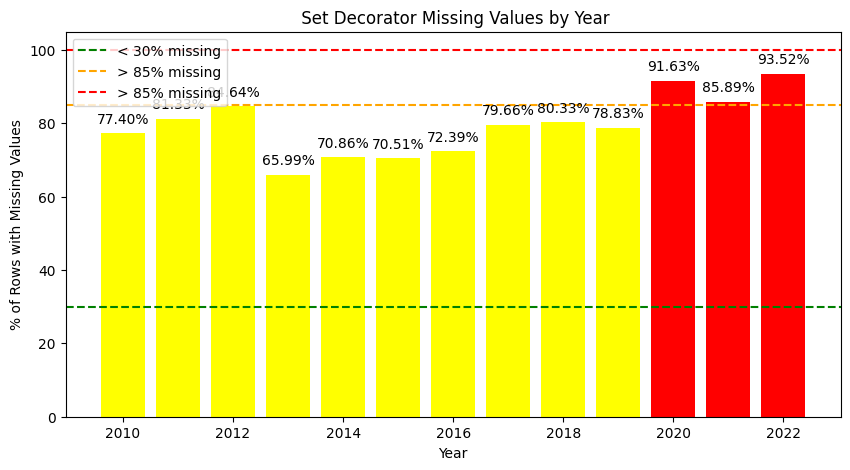

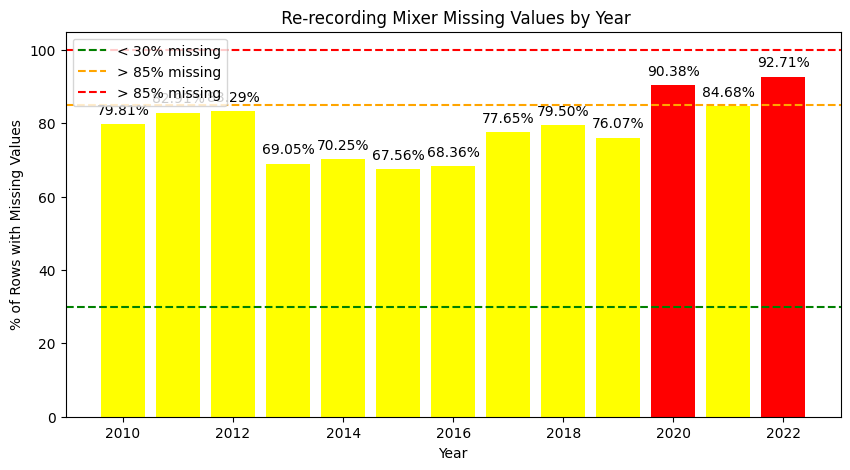

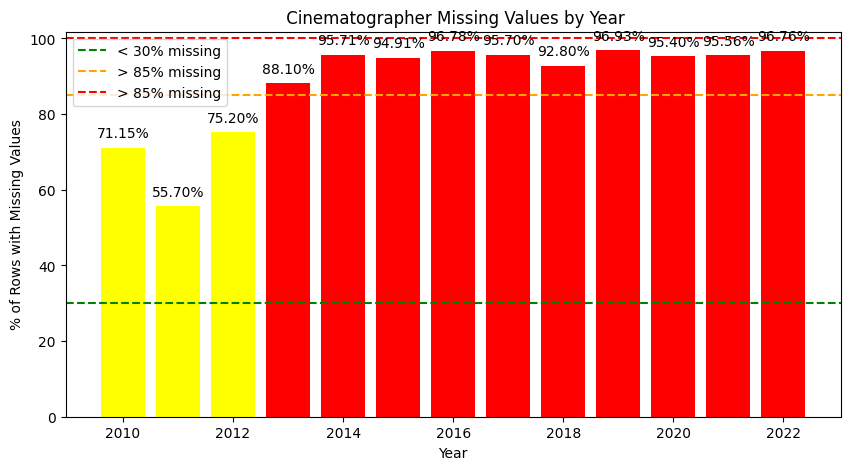

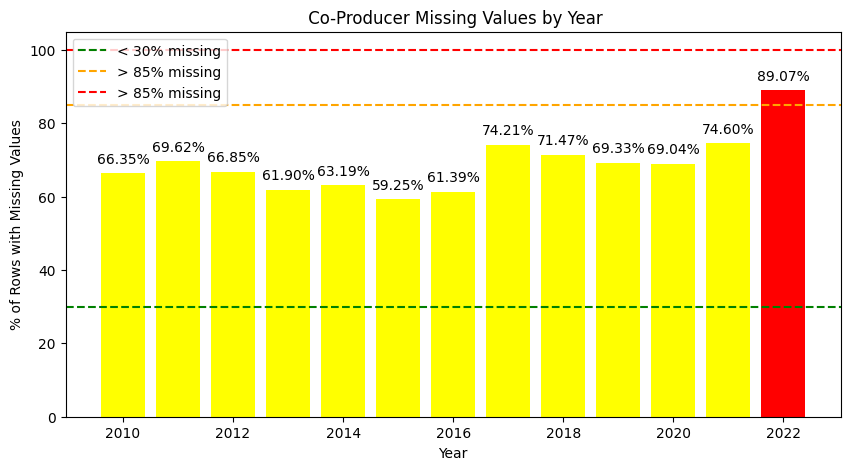

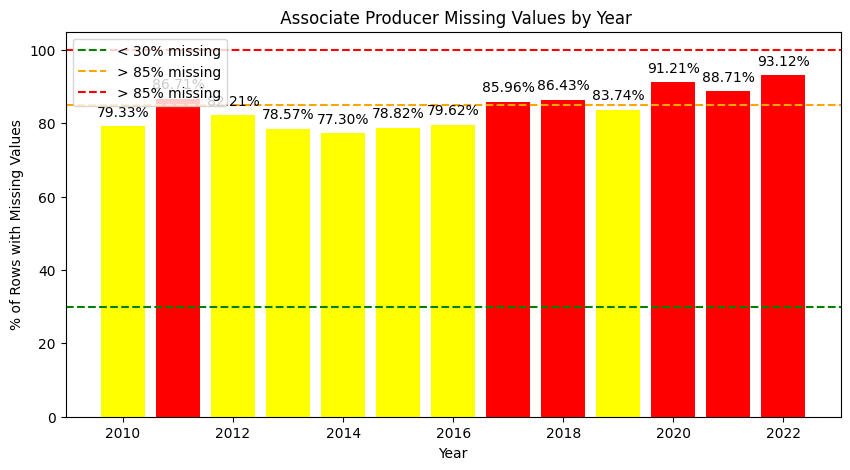

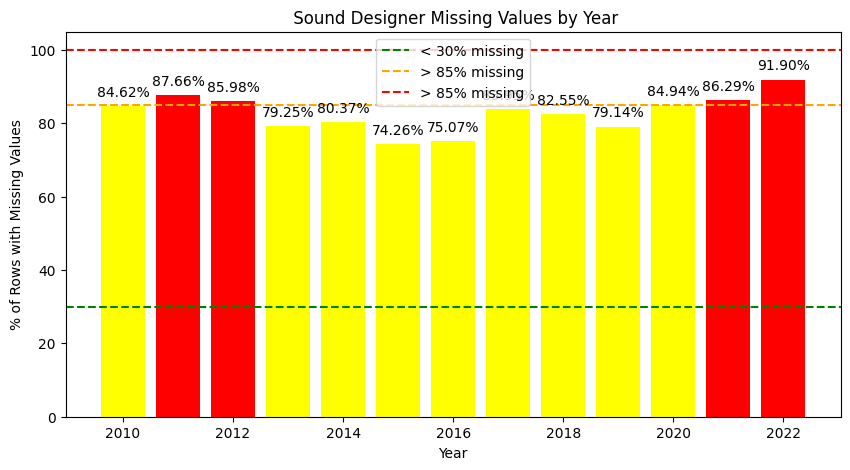

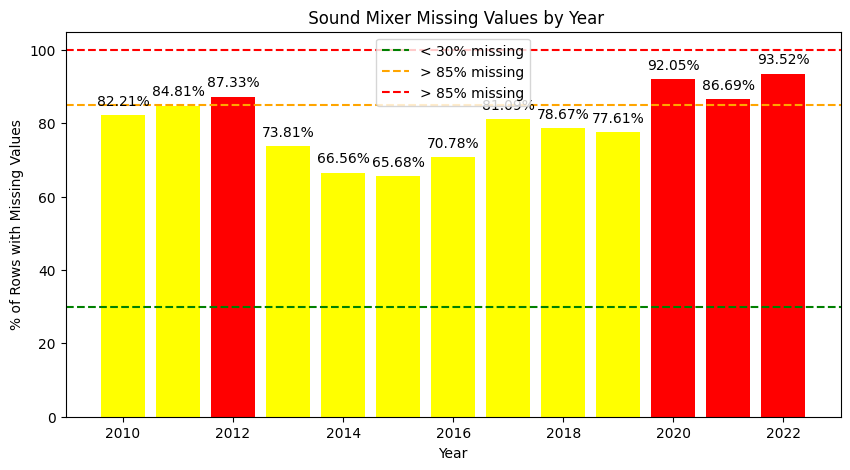

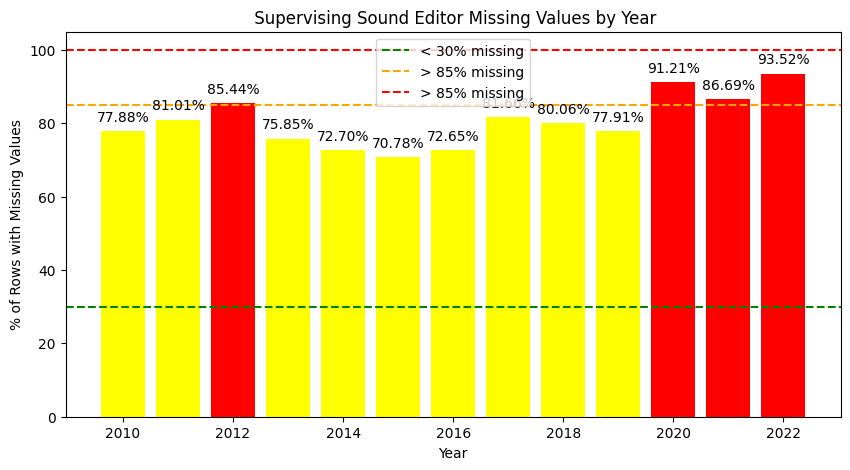

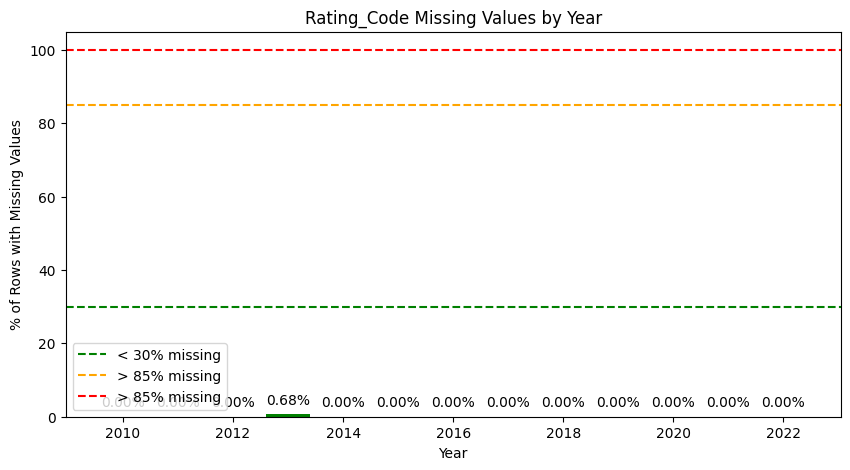

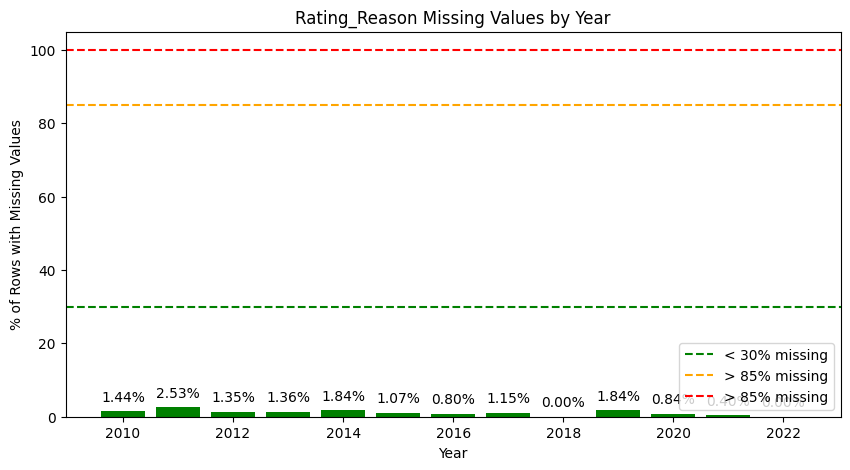

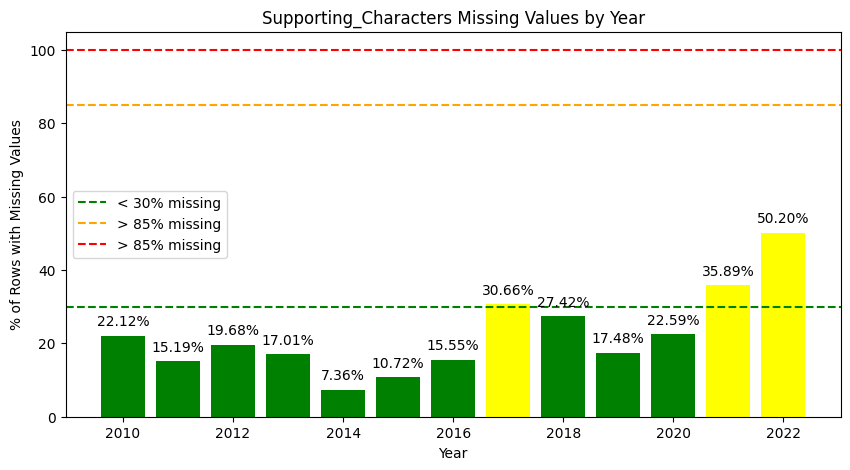

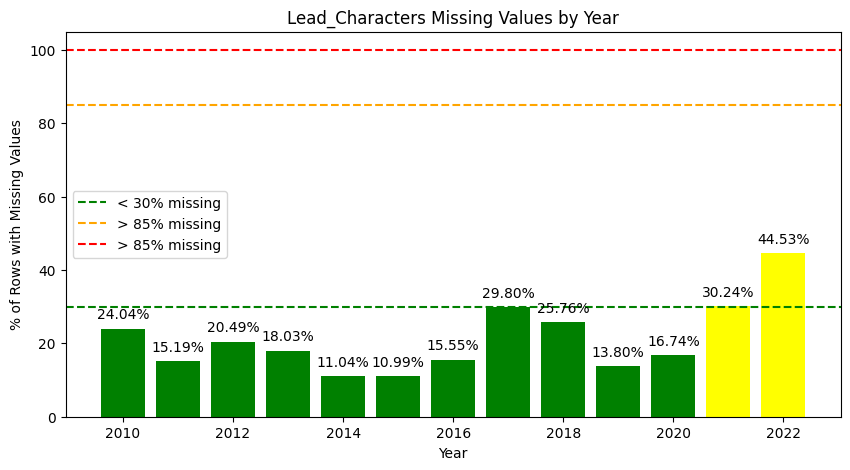

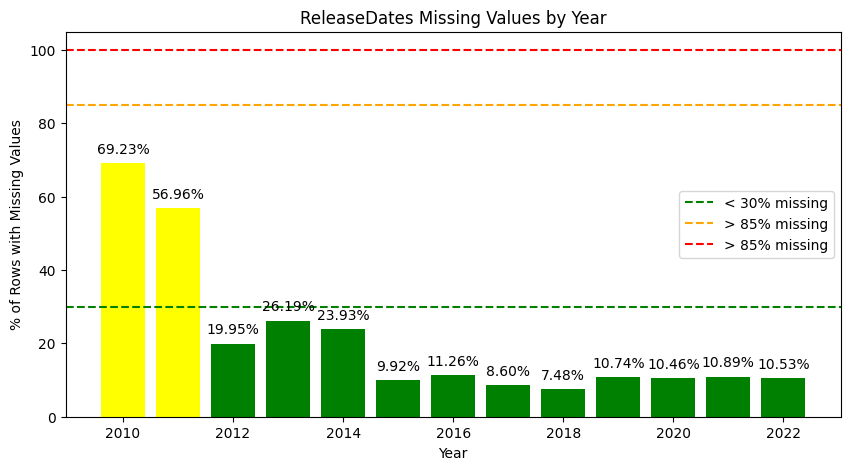

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the threshold values
low_threshold = 30
high_threshold = 85

# Get the list of columns
columns = df_with_rating.columns

# Loop through each column and create a bar plot for each year
for col in columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(f"{col} Missing Values by Year")
    ax.set_xlabel("Year")
    ax.set_ylabel("% of Rows with Missing Values")
    years = df_with_rating['year _x'].unique()
    missing_pct = []
    for year in years:
        year_data = df_with_rating[df_with_rating['year _x']==year]
        total = len(year_data)
        missing = year_data[col].isnull().sum()
        pct = missing / total * 100
        missing_pct.append(pct)
    ax.bar(years, missing_pct, color=['yellow' if low_threshold<=pct<=high_threshold else 'red' if pct>high_threshold else 'green' for pct in missing_pct])
    ax.axhline(y=low_threshold, color='green', linestyle='--', label=f'< {low_threshold}% missing')
    ax.axhline(y=high_threshold, color='orange', linestyle='--', label=f'> {high_threshold}% missing')
    ax.axhline(y=100, color='red', linestyle='--', label=f'> {high_threshold}% missing')
    ax.legend()
    
    # Add the missing values count and percentage to the plot
    for i, year in enumerate(years):
        ax.annotate(f"{missing_pct[i]:.2f}%", xy=(year, missing_pct[i]), xytext=(0, 5),
                    textcoords='offset points', ha='center', va='bottom')
    
    plt.show()

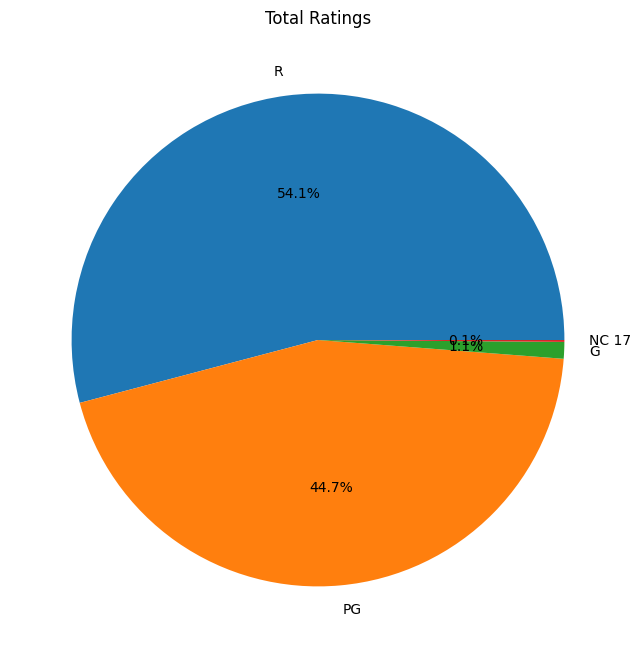

In [ ]:
import matplotlib.pyplot as plt

# Get the total count of ratings
total_ratings = df_with_rating['Rating_Code'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(total_ratings.values, labels=total_ratings.index, autopct='%1.1f%%')
ax.set_title("Total Ratings")
plt.show()


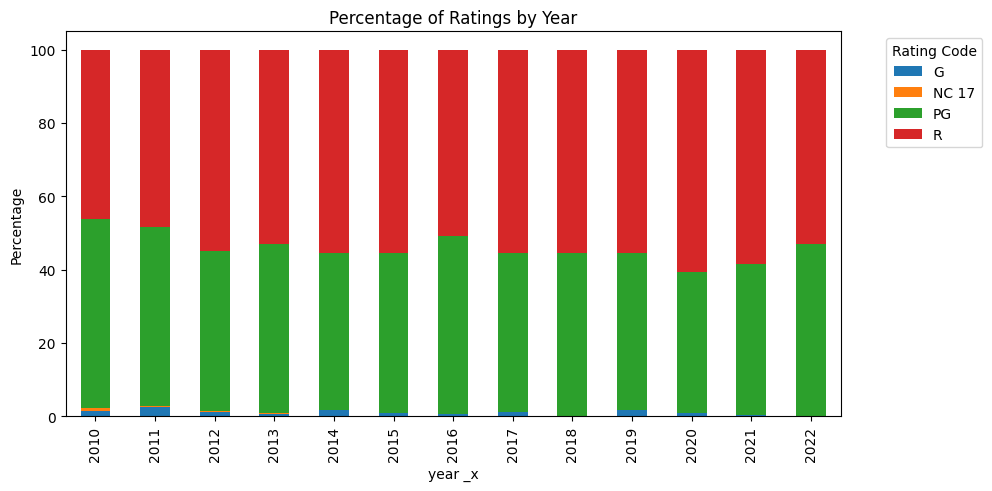

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Compute the percentage of ratings per year _x and Rating_Code
ratings_by_year = df_with_rating.groupby(['year _x', 'Rating_Code']).size().unstack().fillna(0)
ratings_by_year = ratings_by_year.div(ratings_by_year.sum(axis=1), axis=0) * 100

# Plot the stacked bar graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Percentage of Ratings by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ratings_by_year.plot(kind='bar', stacked=True, ax=ax)
ax.legend(title='Rating Code', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ratings_by_year.index, rotation=90)
plt.show()



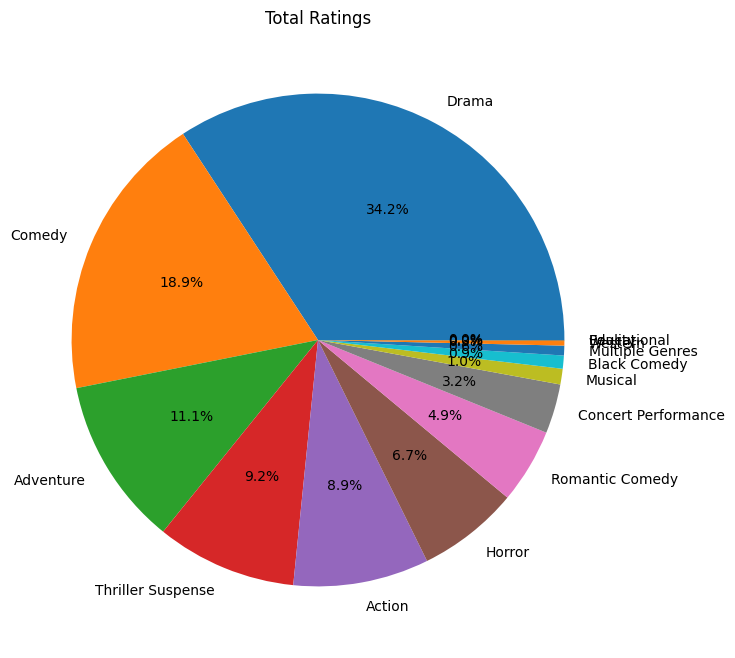

In [ ]:
import matplotlib.pyplot as plt

#Filtering Considering Rating: 

df_genre = df[df['Genre'].notnull()]

# Get the total count of ratings
total_ratings = df_genre['Genre'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(total_ratings.values, labels=total_ratings.index, autopct='%1.1f%%')
ax.set_title("Total Ratings")
plt.show()


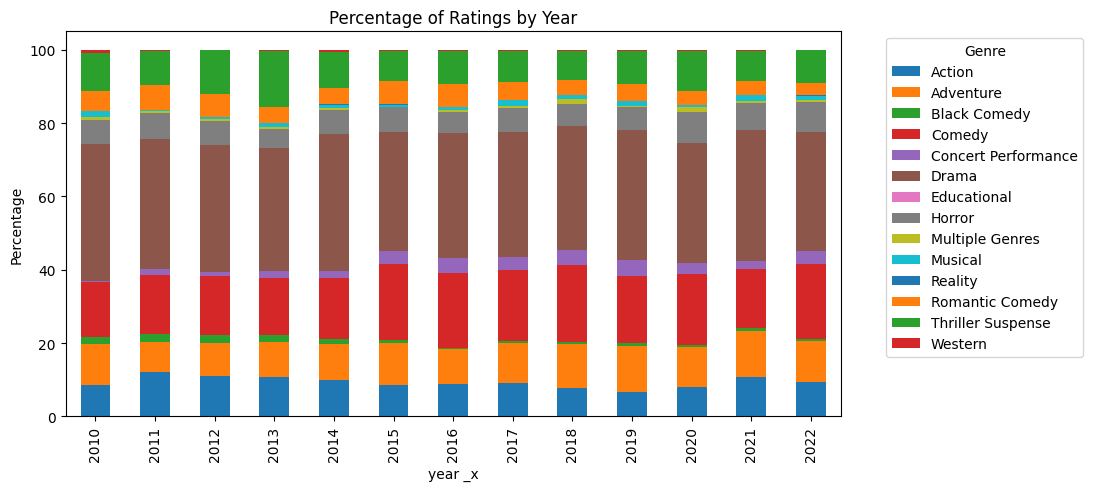

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Compute the percentage of ratings per year _x and Rating_Code
ratings_by_year = df_genre.groupby(['year _x', 'Genre']).size().unstack().fillna(0)
ratings_by_year = ratings_by_year.div(ratings_by_year.sum(axis=1), axis=0) * 100

# Plot the stacked bar graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Percentage of Ratings by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ratings_by_year.plot(kind='bar', stacked=True, ax=ax)
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ratings_by_year.index, rotation=90)
plt.show()

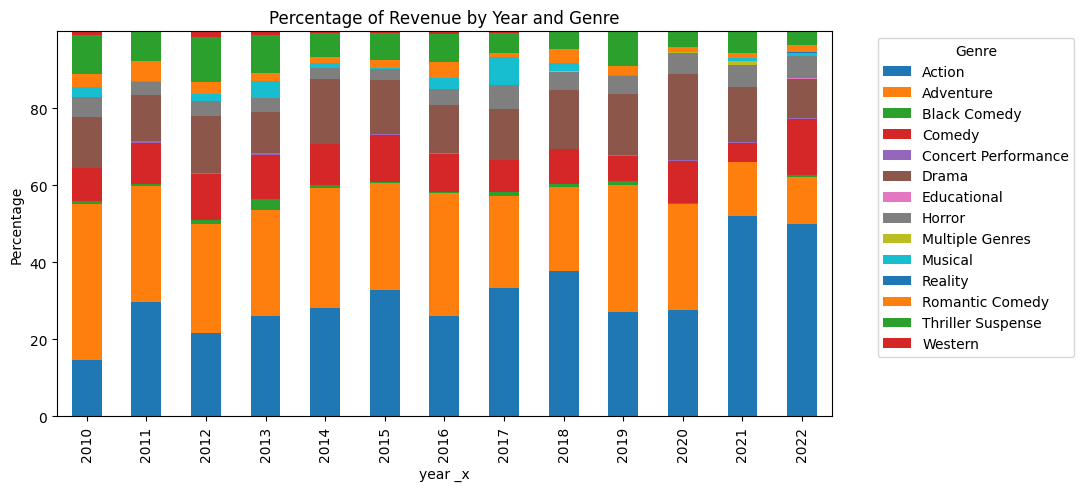

In [ ]:
# Compute the percentage of movie revenue per year and genre
revenue_by_year_genre = df_genre.groupby(['year _x', 'Genre'])['Revenue_int'].sum().unstack().fillna(0)
total_revenue_by_year = revenue_by_year_genre.sum(axis=1)
revenue_by_year_genre_percentage = revenue_by_year_genre.div(total_revenue_by_year, axis=0) * 100

# Plot the stacked bar graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Percentage of Revenue by Year and Genre')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
revenue_by_year_genre_percentage.plot(kind='bar', stacked=True, ax=ax)
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(revenue_by_year_genre_percentage.index, rotation=90)
plt.show()

# **Filtering Sinopsis**

In [ ]:
#Filtering with sypnosis: 

#Filtering Considering Rating: 

df_Synopsis = df[df['Synopsis'].notnull()]

print(df_Synopsis.info())
print(df_Synopsis.head())
#General Info : 5871 rows / 43 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5871 entries, 2 to 15168
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       5871 non-null   object 
 1   Description                 5871 non-null   object 
 2   year _x                     5871 non-null   int64  
 3   Running_Time_x              5740 non-null   object 
 4   Keywords_x                  4969 non-null   object 
 5   Rating                      3585 non-null   object 
 6   CreativeType                5819 non-null   object 
 7   Source                      5824 non-null   object 
 8   Genre                       5860 non-null   object 
 9   Languages                   1585 non-null   object 
 10  Production_type             5868 non-null   object 
 11  Synopsis                    5871 non-null   object 
 12  budget                      2067 non-null   float64
 13  Revenue                     4265

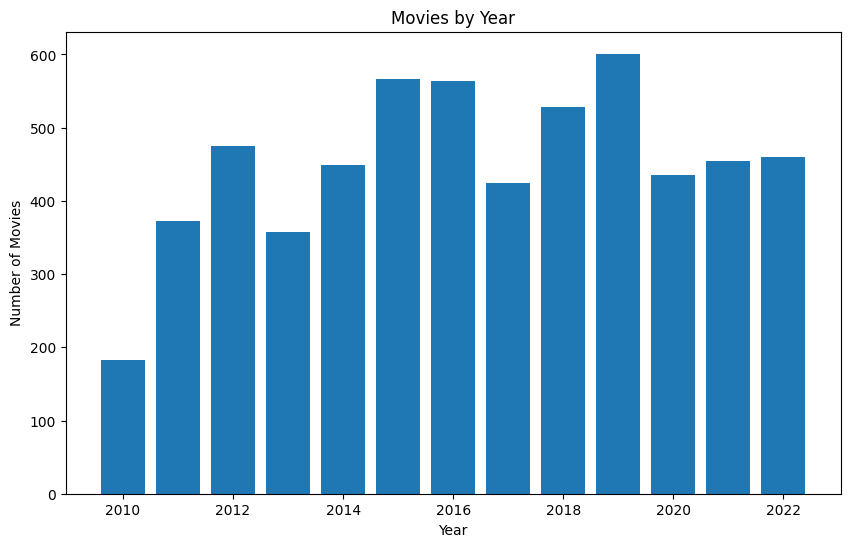

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

year_counts = df_Synopsis['year _x'].value_counts()

# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))  # Set a smaller figure size
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies by Year')



plt.show()

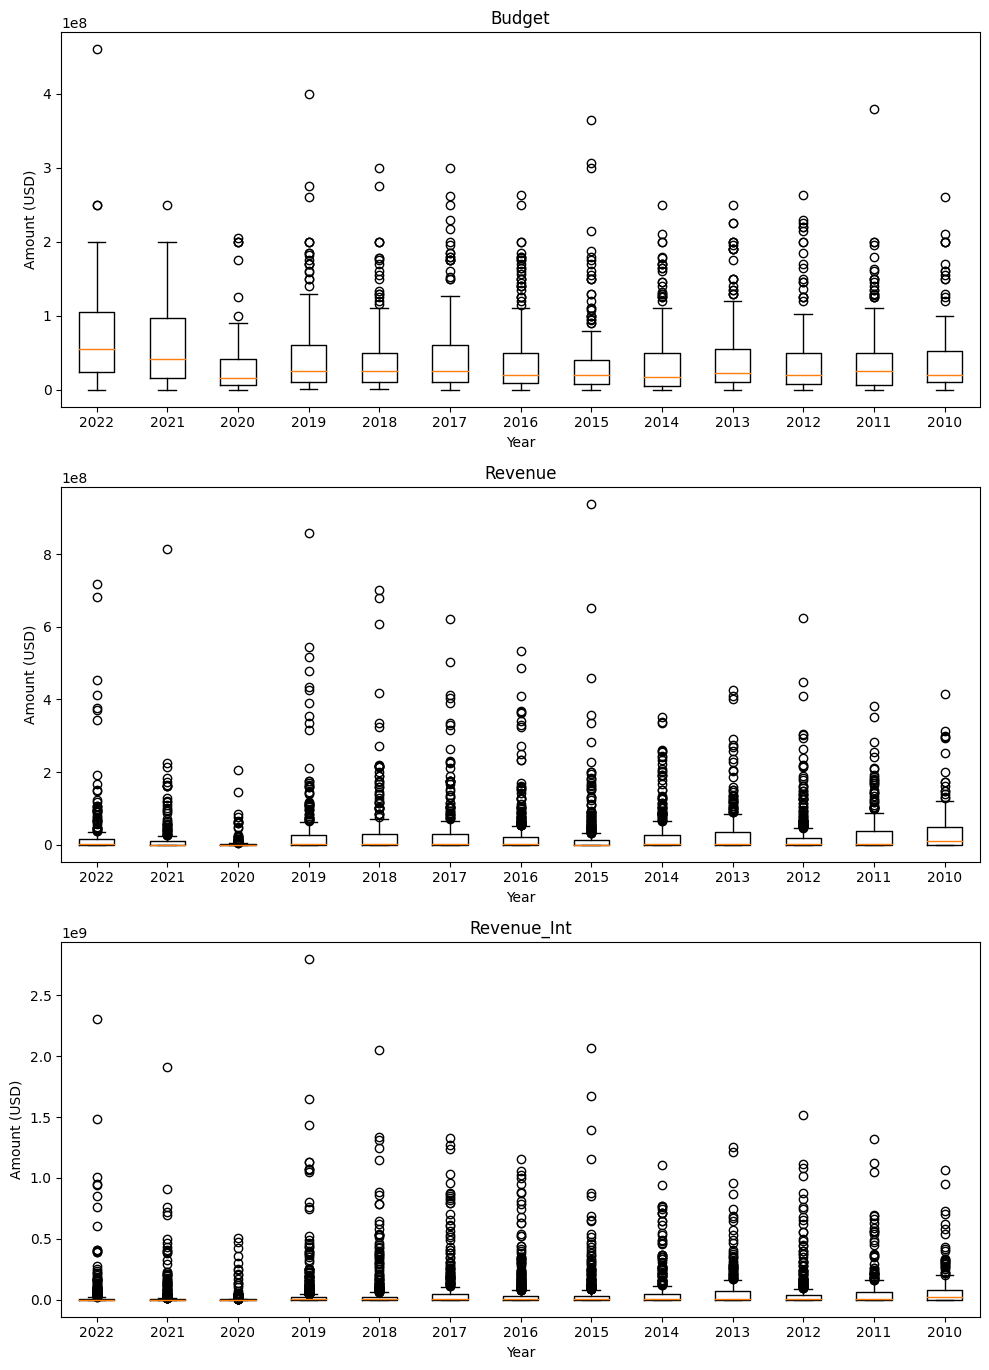

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set up the figure with 3 subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Loop through each subplot and create a box plot
for i, col in enumerate(['budget', 'Revenue', 'Revenue_int']):
    ax = axes[i]
    ax.set_title(col.title())
    ax.set_ylabel('Amount (USD)')
    ax.set_xlabel('Year')
    data = []
    for year in df_Synopsis['year _x'].unique():
        year_data = df_Synopsis[df_Synopsis['year _x']==year][col]
        data.append(year_data.dropna().values)
    ax.boxplot(data)
    ax.set_xticklabels(df_Synopsis['year _x'].unique())

# Adjust the spacing between subplots
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


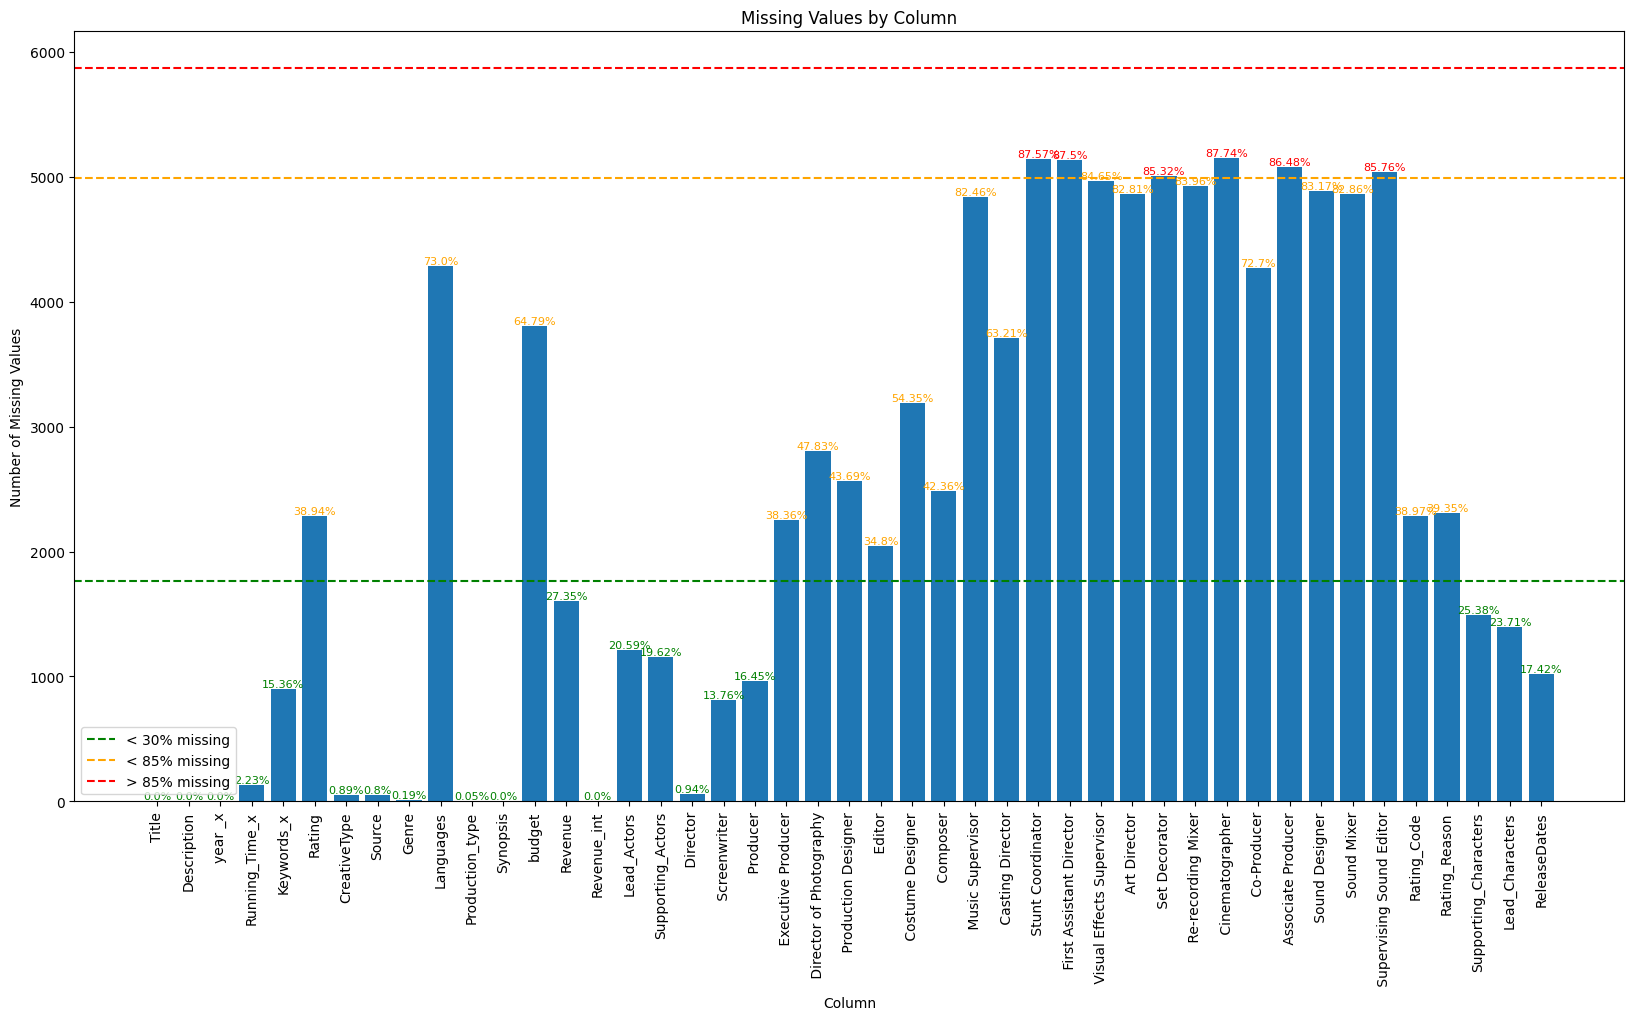

In [ ]:
# Count the number of missing values for each column
missing_values = df_Synopsis.isnull().sum()

# Calculate the percentage of missing values for each column
percent_missing = round((missing_values / len(df_Synopsis)) * 100, 2)

# Set thresholds for differentiating between low, medium, and high missing values
low_threshold = 30
high_threshold = 85

# Create a bar plot to visualize the results
plt.figure(figsize=(20, 10))  # Set the figure size
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Column')

# Add percentage of missing values as text, and differentiate between low, medium, and high missing values
for i, v in enumerate(percent_missing):
    if v < low_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='green')
    elif v < high_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='orange')
    else:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='red')

# Add horizontal lines to identify the different thresholds
plt.axhline(y=low_threshold*len(df_Synopsis)/100, color='green', linestyle='--', label=f'< {low_threshold}% missing')
plt.axhline(y=high_threshold*len(df_Synopsis)/100, color='orange', linestyle='--', label=f'< {high_threshold}% missing')
plt.axhline(y=len(df_Synopsis), color='red', linestyle='--', label=f'> {high_threshold}% missing')
plt.legend()

plt.show()

# **Filtering Buget**

In [ ]:
#Filtering with sypnosis: 

#Filtering Considering Rating: 

df_Budget = df[df['budget'].notnull()]

print(df_Budget.info())
print(df_Budget.head())
#General Info : 5871 rows / 43 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2306 entries, 12 to 15193
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Text                                 2306 non-null   object 
 1   Description                          2306 non-null   object 
 2   year _x                              2306 non-null   int64  
 3   Running_Time_x                       2306 non-null   object 
 4   Keywords_x                           2306 non-null   object 
 5   Description_x                        2306 non-null   object 
 6   Rating                               1996 non-null   object 
 7   CreativeType                         2280 non-null   object 
 8   Source                               2276 non-null   object 
 9   Genre                                2288 non-null   object 
 10  Languages                            1292 non-null   object 
 11  Production_type             

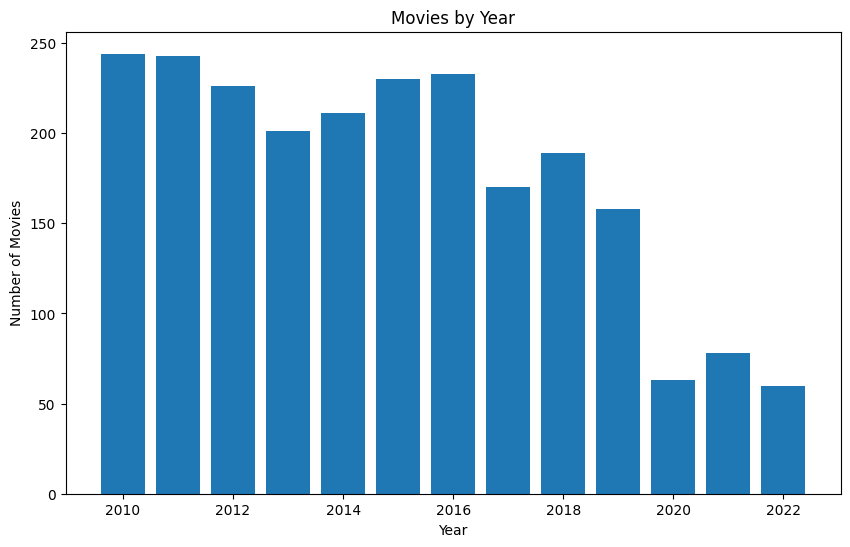

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

year_counts = df_Budget['year _x'].value_counts()

# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))  # Set a smaller figure size
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies by Year')



plt.show()

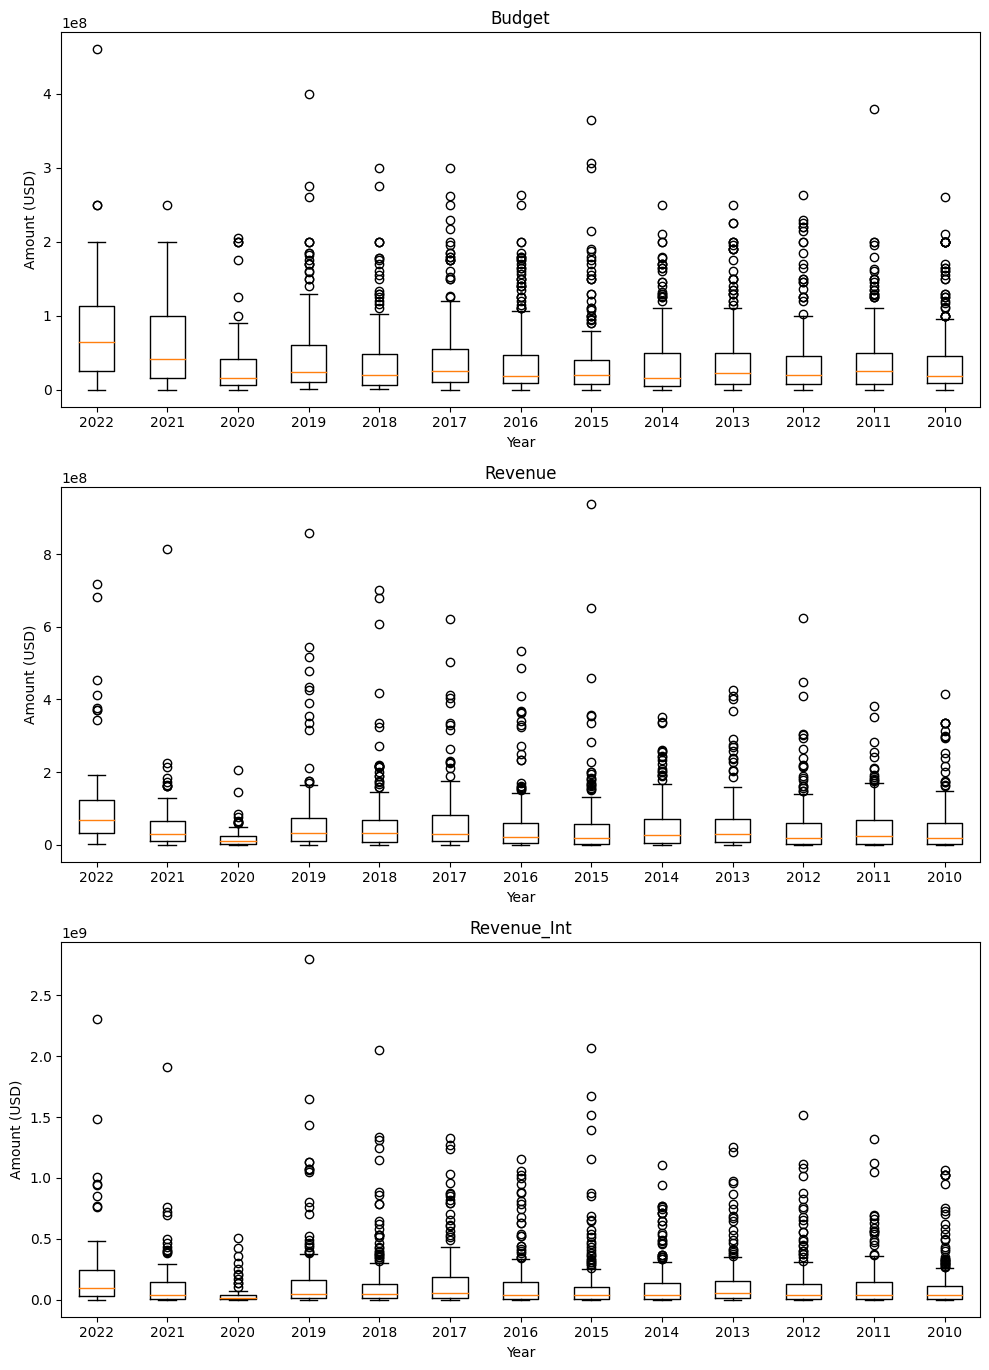

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set up the figure with 3 subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Loop through each subplot and create a box plot
for i, col in enumerate(['budget', 'Revenue', 'Revenue_int']):
    ax = axes[i]
    ax.set_title(col.title())
    ax.set_ylabel('Amount (USD)')
    ax.set_xlabel('Year')
    data = []
    for year in df_Budget['year _x'].unique():
        year_data = df_Budget[df_Budget['year _x']==year][col]
        data.append(year_data.dropna().values)
    ax.boxplot(data)
    ax.set_xticklabels(df_Budget['year _x'].unique())

# Adjust the spacing between subplots
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

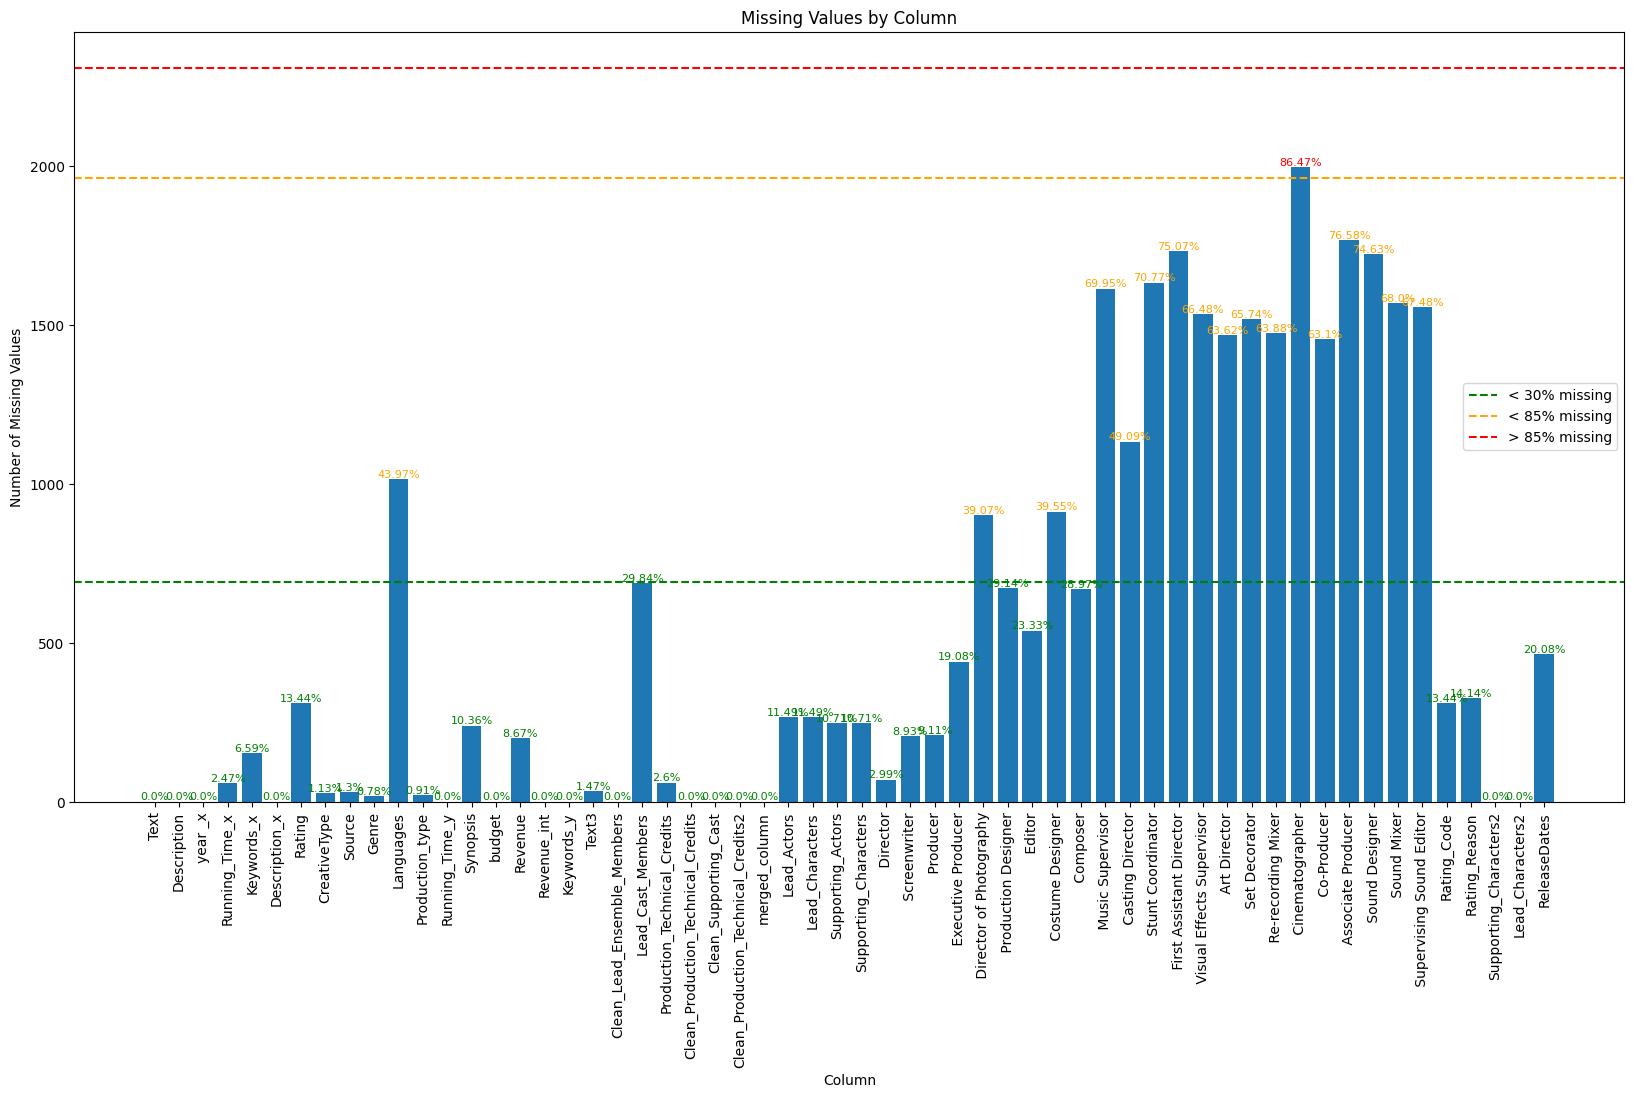

In [ ]:
# Count the number of missing values for each column
missing_values = df_Budget.isnull().sum()

# Calculate the percentage of missing values for each column
percent_missing = round((missing_values / len(df_Budget)) * 100, 2)

# Set thresholds for differentiating between low, medium, and high missing values
low_threshold = 30
high_threshold = 85

# Create a bar plot to visualize the results
plt.figure(figsize=(20, 10))  # Set the figure size
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Column')

# Add percentage of missing values as text, and differentiate between low, medium, and high missing values
for i, v in enumerate(percent_missing):
    if v < low_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='green')
    elif v < high_threshold:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='orange')
    else:
        plt.text(i, missing_values[i], str(v) + '%', ha='center', va='bottom', fontsize=8, color='red')

# Add horizontal lines to identify the different thresholds
plt.axhline(y=low_threshold*len(df_Budget)/100, color='green', linestyle='--', label=f'< {low_threshold}% missing')
plt.axhline(y=high_threshold*len(df_Budget)/100, color='orange', linestyle='--', label=f'< {high_threshold}% missing')
plt.axhline(y=len(df_Budget), color='red', linestyle='--', label=f'> {high_threshold}% missing')
plt.legend()

plt.show()

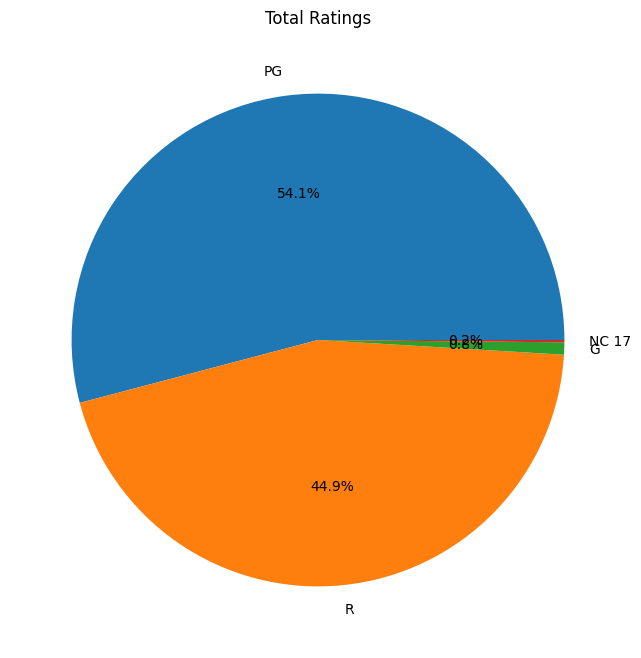

In [ ]:
import matplotlib.pyplot as plt

# Get the total count of ratings
total_ratings = df_Budget['Rating_Code'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(total_ratings.values, labels=total_ratings.index, autopct='%1.1f%%')
ax.set_title("Total Ratings")
plt.show()

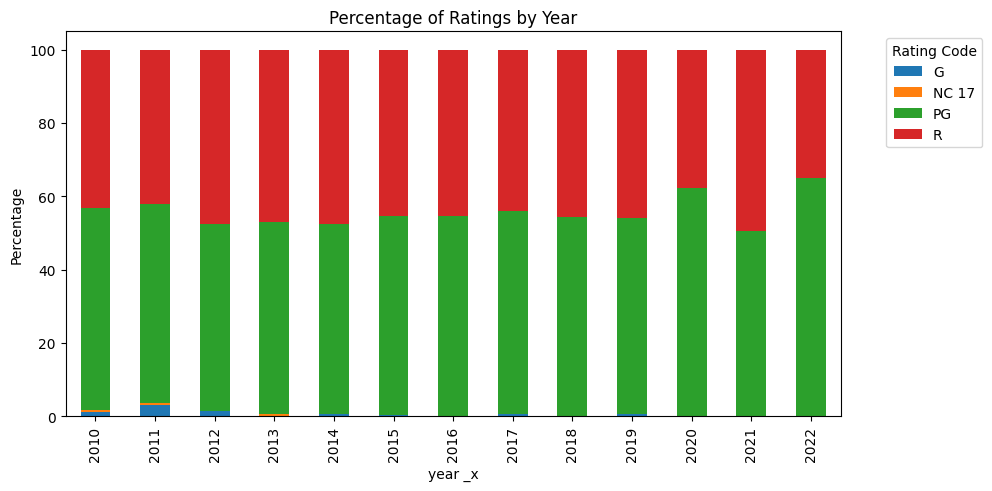

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Compute the percentage of ratings per year _x and Rating_Code
ratings_by_year = df_Budget.groupby(['year _x', 'Rating_Code']).size().unstack().fillna(0)
ratings_by_year = ratings_by_year.div(ratings_by_year.sum(axis=1), axis=0) * 100

# Plot the stacked bar graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Percentage of Ratings by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ratings_by_year.plot(kind='bar', stacked=True, ax=ax)
ax.legend(title='Rating Code', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ratings_by_year.index, rotation=90)
plt.show()


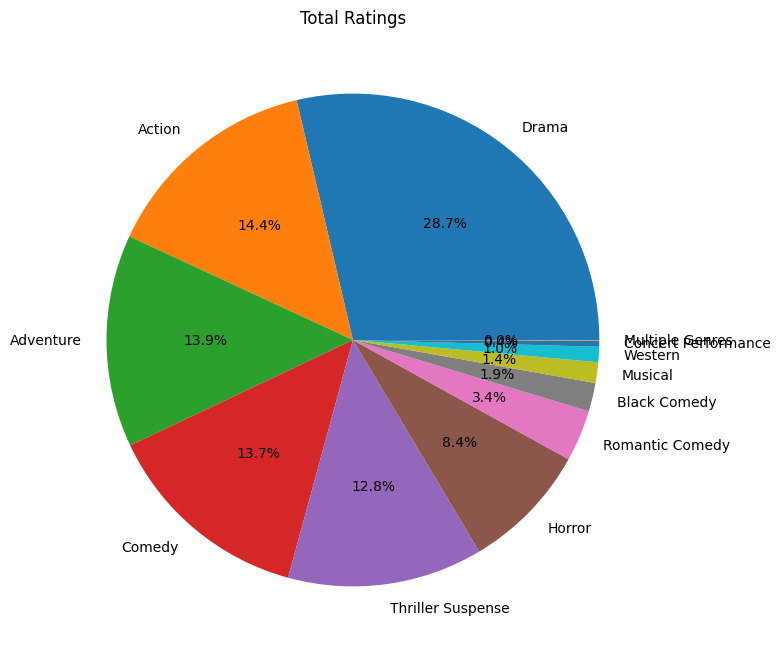

In [ ]:
import matplotlib.pyplot as plt

#Filtering Considering Rating: 

df_genre = df_Budget[df_Budget['Genre'].notnull()]

# Get the total count of ratings
total_ratings = df_genre['Genre'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(total_ratings.values, labels=total_ratings.index, autopct='%1.1f%%')
ax.set_title("Total Ratings")
plt.show()

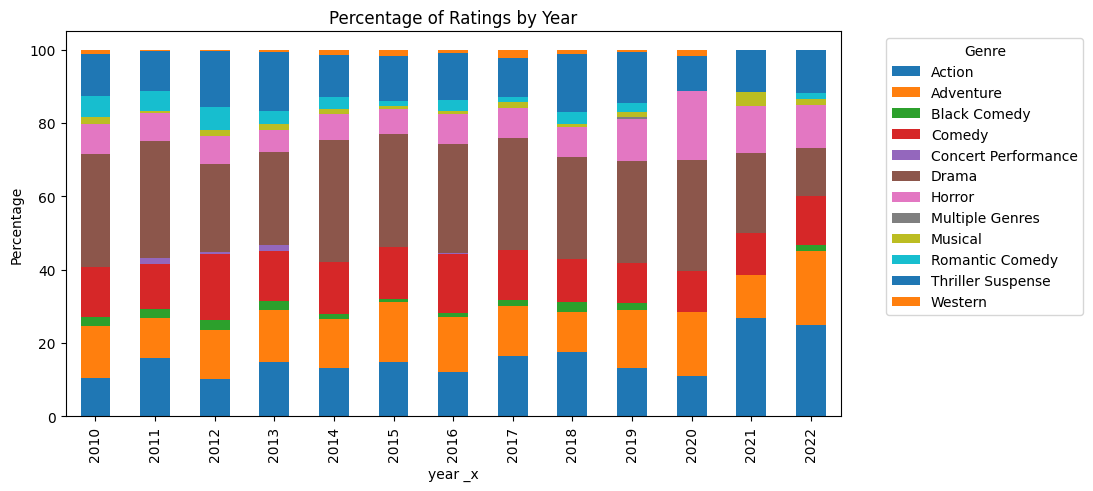

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Compute the percentage of ratings per year _x and Rating_Code
ratings_by_year = df_genre.groupby(['year _x', 'Genre']).size().unstack().fillna(0)
ratings_by_year = ratings_by_year.div(ratings_by_year.sum(axis=1), axis=0) * 100

# Plot the stacked bar graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Percentage of Ratings by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ratings_by_year.plot(kind='bar', stacked=True, ax=ax)
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ratings_by_year.index, rotation=90)
plt.show()

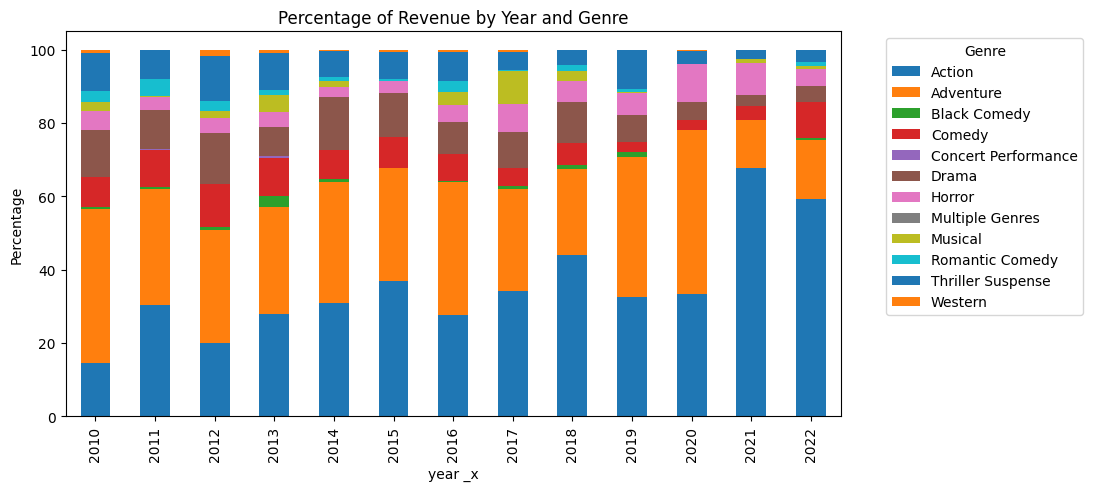

In [ ]:
# Compute the percentage of movie revenue per year and genre
revenue_by_year_genre = df_genre.groupby(['year _x', 'Genre'])['Revenue_int'].sum().unstack().fillna(0)
total_revenue_by_year = revenue_by_year_genre.sum(axis=1)
revenue_by_year_genre_percentage = revenue_by_year_genre.div(total_revenue_by_year, axis=0) * 100

# Plot the stacked bar graph
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Percentage of Revenue by Year and Genre')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
revenue_by_year_genre_percentage.plot(kind='bar', stacked=True, ax=ax)
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(revenue_by_year_genre_percentage.index, rotation=90)
plt.show()

In [ ]:
df.to_excel('Final_DF_Movies.xlsx', index=False)